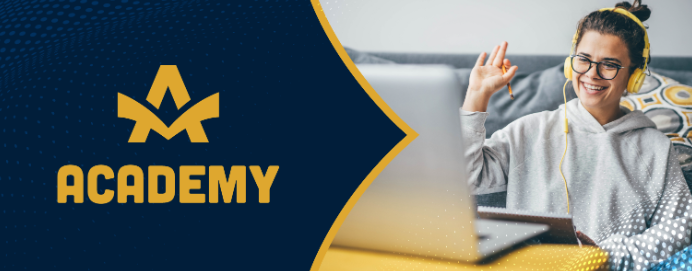

In [1]:
# !pip install jyquickhelper
# see documentation at http://www.xavierdupre.fr/app/jyquickhelper/helpsphinx/index.html

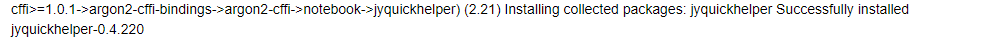

In [2]:
# add notebook summary
import jyquickhelper as jqh
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id='OCDA_P2_N1_menu', raw=False, format='html', header="NOTEBOOK 1 SUMMARY - Data import & exploratory analysis", first_level=1, last_level=5,
                  keep_item=None)

# Introduction - Load packages and check versions

In [3]:
# !pip install virtualenv

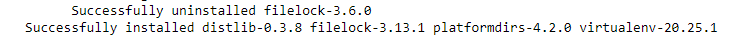

In [4]:
# !pip install --user ipykernel

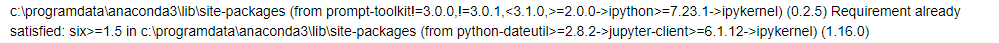

In [5]:
# ! pip install ipykernel

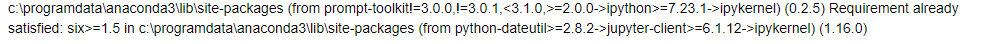

In [6]:
# !ipython kernel install --user --name=OCDS_P2

In [7]:
# ! pip install nltk

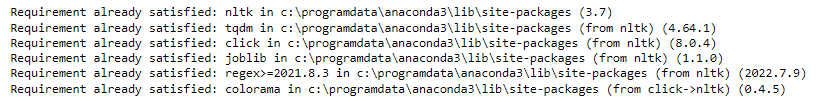

In [8]:
# ! pip install wordcloud

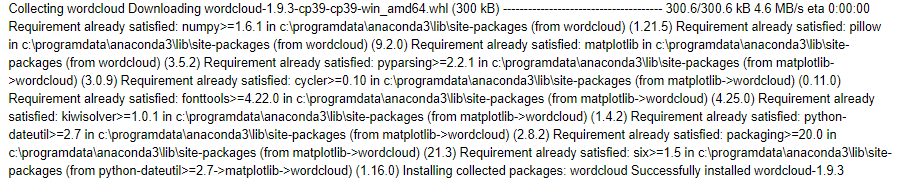

In [9]:
# import librairies and functions needed for project
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from functions import *

# extract colors from school logo for ppt slideshow
tango = findColor('orange.png')
coal = findColor('grey.png')
print(tango)
print(coal)

# set dataframe display options
pd.set_option('max_colwidth', None)

#dea72f
#011e3a


In [10]:
# check package versions
print("Packages versions : \n")
print("jyquickhelper -", jqh.__version__)
print("matplotlib -", mpl.__version__)
print("missingno -", msno.__version__)
print("numpy -", np.__version__)
print("pandas -", pd.__version__)
print("seaborn -", sns.__version__)
print("python -", sys.version[0:6])

Packages versions : 

jyquickhelper - 0.4.220
matplotlib - 3.5.2
missingno - 0.4.1
numpy - 1.21.5
pandas - 1.4.4
seaborn - 0.11.2
python - 3.9.13


# 1. Import, describe & clean data

In [11]:
# load data
country = pd.read_csv('EdStatsCountry.csv', encoding="utf-8",delimiter=',')
country_series = pd.read_csv('EdStatsCountry-Series.csv', encoding="utf-8",delimiter=',')
data = pd.read_csv('EdStatsData.csv', encoding="utf-8",delimiter=',')
footnote = pd.read_csv('EdStatsFootNote.csv', encoding="utf-8",delimiter=',')
series = pd.read_csv('EdStatsSeries.csv', encoding="utf-8",delimiter=',')

## 1.1. EdStatsCountry.csv

### 1.1.1 Import & describe

In [12]:
country.shape

(241, 32)

In [13]:
country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                                                                                                                                                                                                                       Special Notes  \
0                                                                                                      SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.   
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.   
2                                                                                                                 April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.   
3                                                                                                                                                                                                                                                NaN   
4                                                                                                                                                                                                                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                                           Latest population census  \
0                                                              2010   
1                                                              1979   
2                                                              1970   
3                                                              2011   
4  2011. Population figures compiled from administrative registers.   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

        Source of most recent Income and expenditure data  \
0                                                     NaN   
1                 Integrated household survey (IHS), 2008   
2                 Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSMS), 2012   
4                                                     NaN   

  Vital registration complete Late

In [14]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [15]:
country.describe(include=[object])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit  \
count            215   
unique           152   
top             Euro   
freq              23   

                                                                                                                                                   Special Notes  \
count                                                                                                                                                        145   
unique                                                                                                                                                       131   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                           6   

                       Region         Income Group WB-2 code  ...  \
count                     214                  214       240  ...   
unique                      7                    5       240  ...   
top     Europe & Central Asia  Upper middle income        AW  ...   
freq                       57                   55         1  ...   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111                        142   
unique                           2                         35   
top                            Yes                       2010   
freq                           110                         36   

       Latest water withdrawal data  
count                           179  
unique                           20  
top                            2000  
freq                             40  

[4 rows x 28 columns]

In [16]:
# check for duplicates
country_dup = country.loc[country.duplicated() == True]
country_dup.shape[0]

0

- La table ne contient pas de valeurs dupliquees.

In [17]:
country.describe(include=[np.number])

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  Unnamed: 31  
count         185.000000          0.0  
mean         2010.994595          NaN  
std             2.569675          NaN  
min          1995.000000          NaN  
25%          2011.000000          NaN  
50%          2012.000000          NaN  
75%          2012.000000          NaN  
max          2012.000000          NaN

<AxesSubplot:>

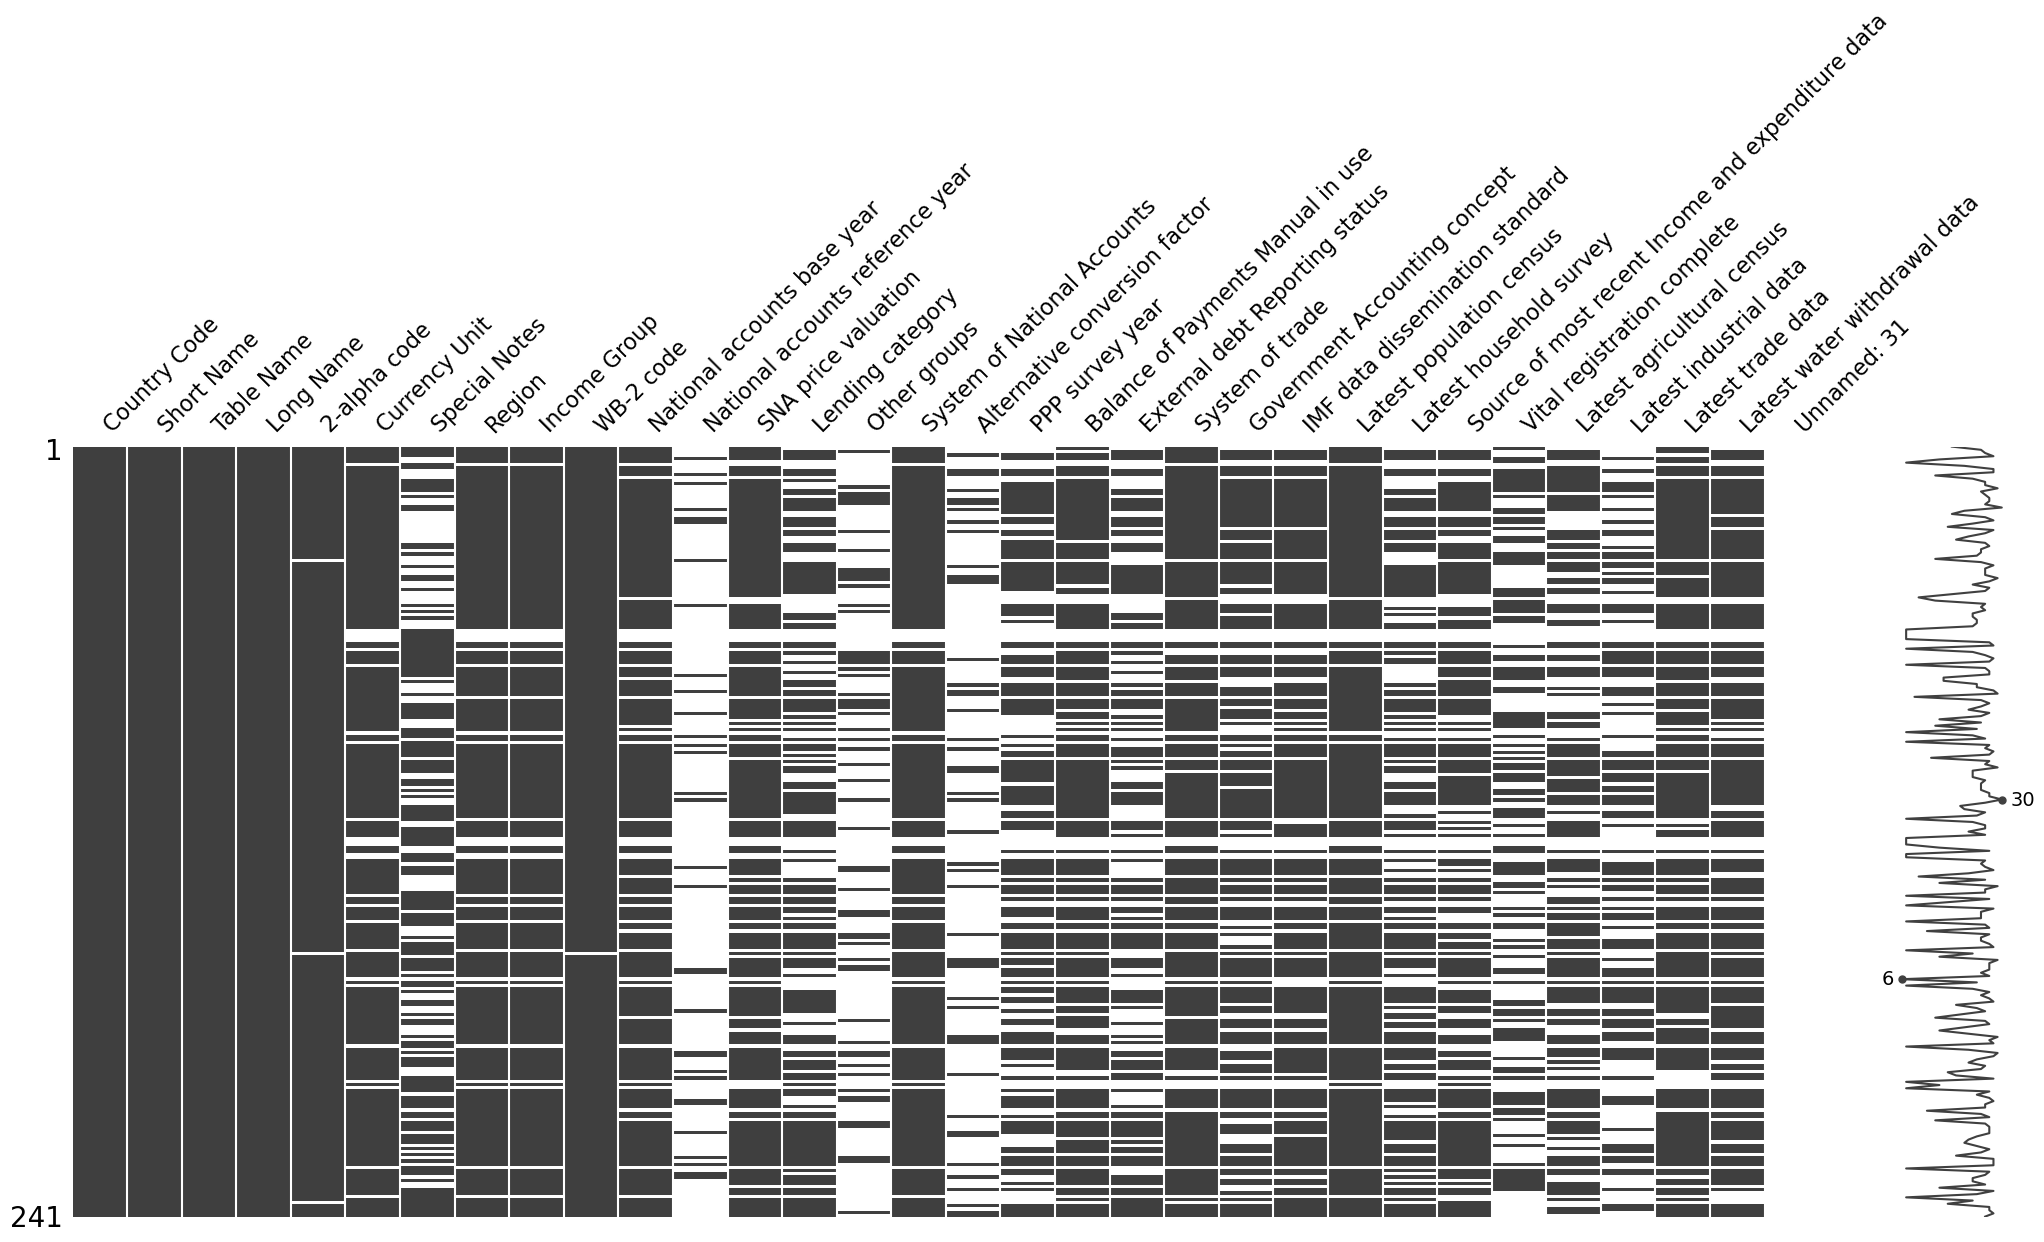

In [18]:
# map missing values
msno.matrix(country)

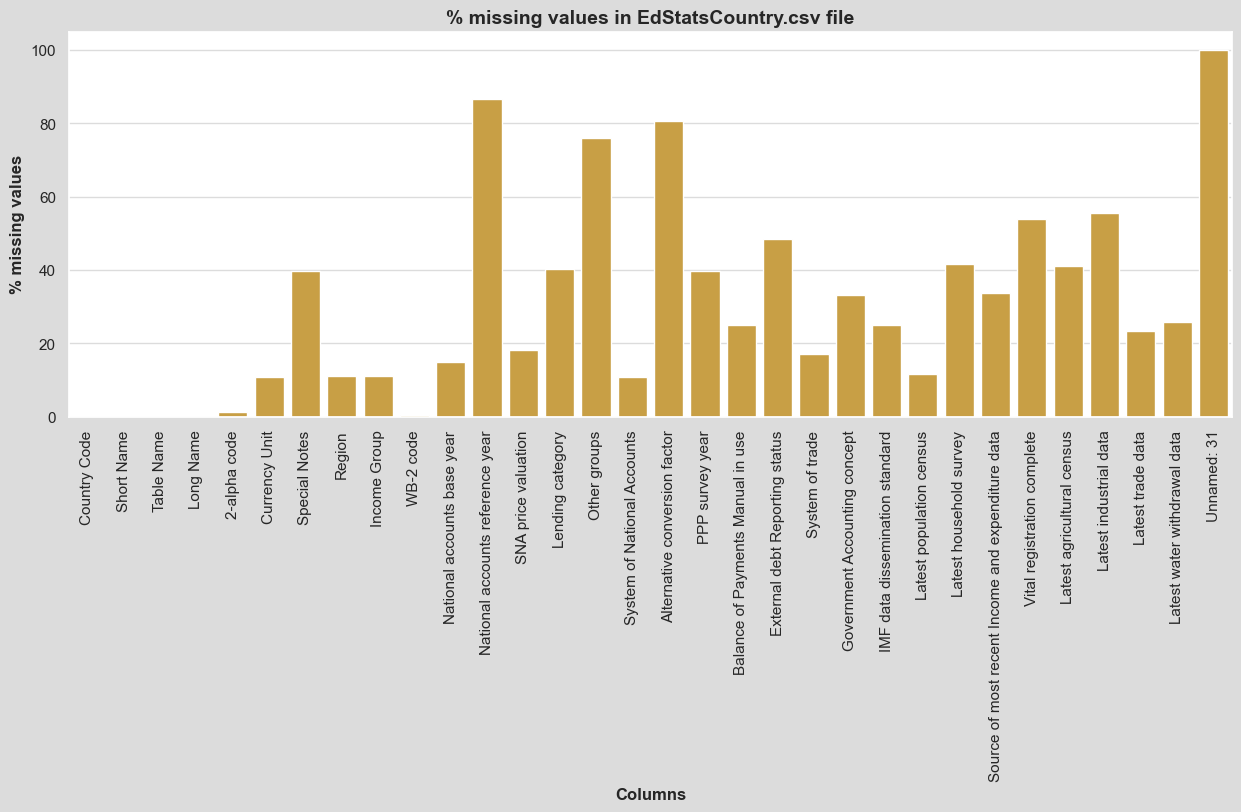

In [19]:
# plot % of missing values
country_nulls = pd.DataFrame(country.isnull().mean() * 100).reset_index()
country_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph11a = sns.barplot(data = country_nulls, x='Column', y='% missing values', color=tango)
plt.title('% missing values in EdStatsCountry.csv file', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("11a.png", bbox_inches='tight')

- Les colonnes les plus pertinentes pour notre analyse sont : 'Country Code', 'Short Name','Currency Unit', 'Region', 'Income Group' et 'System of trade'. Explorons plus en detail chacune de ces colonnes.

In [20]:
# calculate % of nulls in entire dataframe
country_nulls_pct = country.isna().sum().sum() / (country.shape[0]*country.shape[1]/100)
print(round(country_nulls_pct,2), '% de valeurs manquantes dans la table')

30.52 % de valeurs manquantes dans la table


In [21]:
len(country['Country Code'].unique())

241

In [22]:
isCandKey(country, 'Country Code')

Country Code est une clé candidate.


True

- La colonne Country Code contient le code du pays sur 3 caracteres et est une cle primaire de la table Country. Nous utiliserons donc cette colonne pour les jointures de cette tables avec les autres tables du dataset.

### 1.1.2 Explore, clean & export

In [23]:
country["Short Name"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


- La colonne Short Name contient des groupements de pays ainsi que des pays en situation de guerre, d'instabilite politique tres forte ou faisant l'objet d'embargos internationaux, qu'il convient de retirer.

In [24]:
currency_nulls = country.loc[country['Currency Unit'].isna() == True]
currency_nulls['Short Name'].unique()

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

- Les Short Names pour lesquels la devise n'est pas renseignee sont en fait des groupements de pays et un petit pays insulaire a faible potentiel pour notre secteur d'activite (Nauru), que nous pourrons donc retirer du referentiel des pays.

In [25]:
country["Region"].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [26]:
region_nulls = country.loc[country['Region'].isna() == True]
region_nulls['Short Name'].unique()

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

In [27]:
country["Income Group"].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [28]:
income_nulls = country.loc[country['Income Group'].isna() == True]
income_nulls['Short Name'].unique()

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

- Les lignes pour lesquelles Income Group est vide sont essentiellement des groupements de pays ;
- Gibraltar est un territoire britannique et Nauru un petit etat insulaire a faible potentiel pour notre activite : nous retirerons donc egalement ces pays de l'analyse.

In [29]:
country["System of trade"].unique()

array(['Special trade system', 'General trade system', nan], dtype=object)

In [30]:
country["Lending category"].unique()

array([nan, 'IDA', 'IBRD', 'Blend'], dtype=object)

- Les colonnes "System of trade" et "Lending category" ne contiennent pas d'indicateurs permettant d'evaluer le degre d'ouverture economique du pays ; nous les eliminerons donc finalement de l'analyse.

In [31]:
# remove all rows that are not countries, are countries facing embargoes or war, are territories of other countries
# or are scarcely populated remote islands
countries_out = ['Arab World', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)',
                 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Euro area',
                 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income',
                 'Latin America & Caribbean (developing only)', 'Latin America & Caribbean (all income levels)',
                 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
                 'Middle East & North Africa (all income levels)', 'Middle income',
                 'Middle East & North Africa (developing only)', 'North America','OECD members', "Dem. People's Rep. Korea",
                 'West Bank and Gaza', 'Russia', 'South Asia', 'Sub-Saharan Africa (developing only)', 'South Sudan',
                 'Sub-Saharan Africa (all income levels)', 'Timor-Leste', 'Syrian Arab Republic', 'Ukraine',
                 'Upper middle income', 'World', 'Yemen', 'Gibraltar', 'Nauru', 'Aruba', 'Afghanistan', 'American Samoa',
                 'Channel Islands', 'Curaçao', 'Eritrea', 'Faeroe Islands', 'Micronesia', 'Greenland', 'Guam',
                 'Hong Kong SAR, China', 'Haiti', 'Isle of Man', 'Iran', 'Israel', 'Kiribati', 'St. Kitts and Nevis', 
                 'St. Lucia','Macao SAR, China', 'St. Martin (French part)', 'Maldives', 'Marshall Islands', 'Myanmar',
                 'Northern Mariana Islands', 'New Caledonia', 'Palau', 'Papua New Guinea', 'Puerto Rico',
                 'West Bank and Gaza', 'French Polynesia', 'Solomon Islands', 'São Tomé and Principe',
                 'Sint Maarten (Dutch part)', 'Seychelles', 'Turks and Caicos Islands', 'Trinidad and Tobago', 
                 'St. Vincent and the Grenadines', 'Virgin Islands', 'Vanuatu', 'Samoa']

# keep only relevant columns
countries_trim = country.loc[~country['Short Name'].isin(countries_out)][['Country Code', 'Short Name', 'Region',
                                                                          'Income Group']]

In [32]:
# typecasting
countries_trim['Country Code'] = countries_trim['Country Code'].astype('string')
countries_trim['Short Name'] = countries_trim['Short Name'].astype('string')
countries_trim['Region'] = countries_trim['Region'].astype('string')
countries_trim['Income Group'] = countries_trim['Income Group'].astype('string')

# rename columns
countries_trim.rename(columns={'Country Code': 'c_country_code', 'Short Name': 'c_country_name', 'Region':'c_region',
                        'Income Group':'c_income_group'}, inplace=True)

In [33]:
# check for absence of nulls in resulting df
countries_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 2 to 240
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   c_country_code  167 non-null    string
 1   c_country_name  167 non-null    string
 2   c_region        167 non-null    string
 3   c_income_group  167 non-null    string
dtypes: string(4)
memory usage: 6.5 KB


In [34]:
# export clean df for further analyses
countries_trim.to_csv('countries_trim.csv', index=False, encoding='utf8')

In [35]:
# store final set of countries in list
final_country_list = countries_trim['c_country_code'].tolist()
len(final_country_list)

167

## 1.2. EdStatsCountry-Series.csv

### 1.2.1 Import & describe

In [36]:
country_series.shape

(613, 4)

In [37]:
country_series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects         NaN  
1   Data sources: United Nations World Population Prospects         NaN  
2   Data sources: United Nations World Population Prospects         NaN  
3                        Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population Prospects         NaN

In [38]:
country_series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [39]:
country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [40]:
country_series.describe(include=[object])

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                                     DESCRIPTION  
count                                                        613  
unique                                                        97  
top     Data sources : United Nations World Population Prospects  
freq                                                         154

In [41]:
# check for duplicates
country_series_dup = country_series.loc[country_series.duplicated() == True]
country_series_dup.shape[0]

0

- La table ne contient pas de valeurs dupliquees.

<AxesSubplot:>

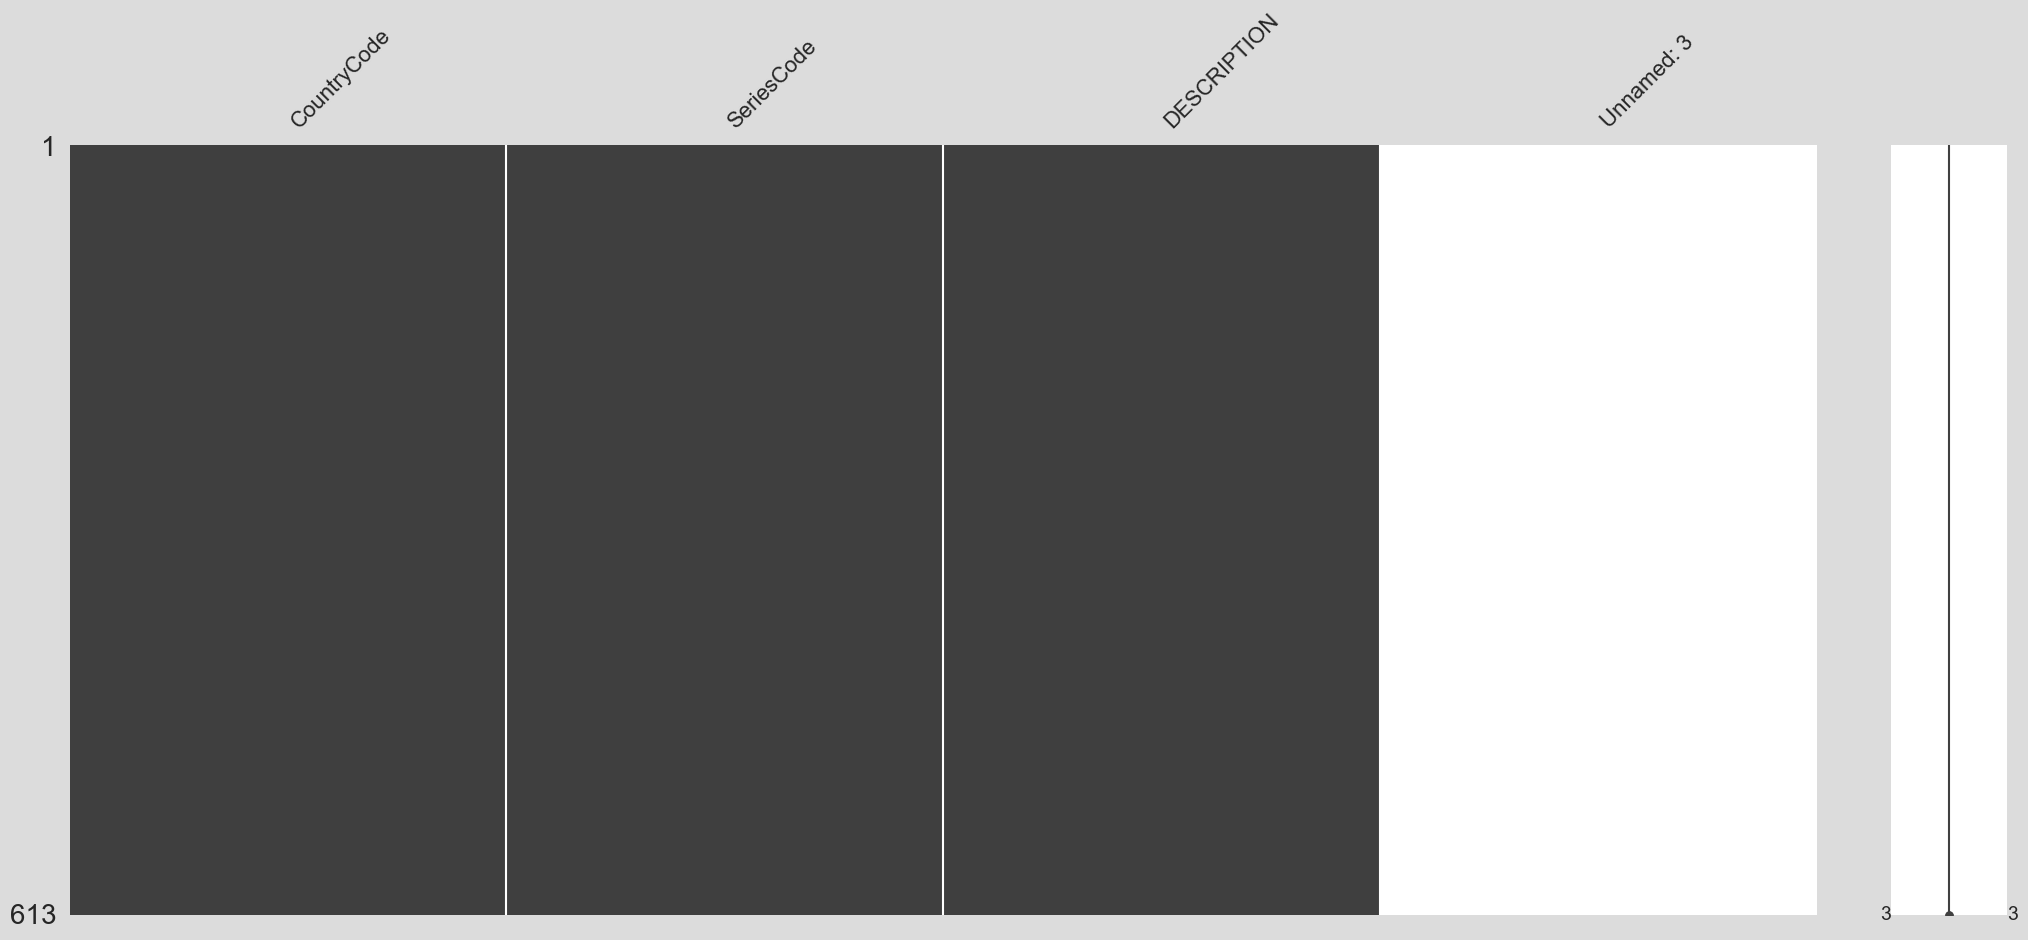

In [42]:
# map missing values
msno.matrix(country_series)

In [43]:
# calculate % of nulls in entire dataframe
country_series_nulls_pct = country_series.isna().sum().sum() / (country_series.shape[0]*country_series.shape[1]/100)
print(round(country_series_nulls_pct,2), '% de valeurs manquantes dans la table')

25.0 % de valeurs manquantes dans la table


### 1.2.2 Explore, clean & export

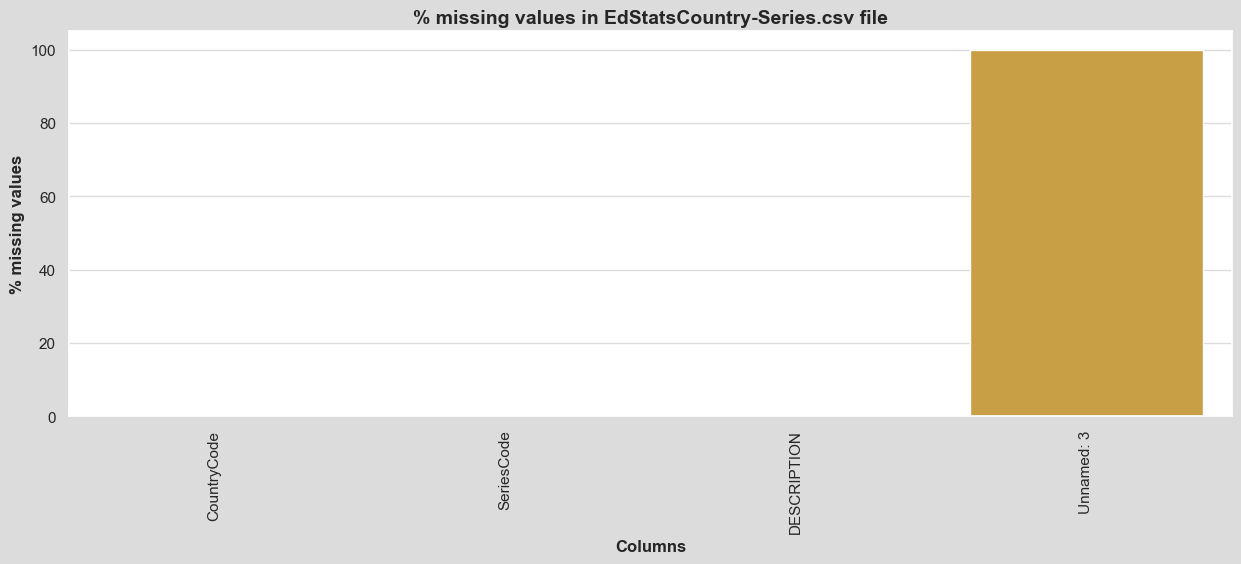

In [44]:
# plot % of missing values
country_series_nulls = pd.DataFrame(country_series.isnull().mean() * 100).reset_index()
country_series_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)

sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph12a = sns.barplot(data = country_series_nulls, x='Column', y='% missing values', color=tango)
plt.title('% missing values in EdStatsCountry-Series.csv file', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("12a.png", bbox_inches='tight')

- La colonne 'Unnamed: 3' est entierement vide, il conviendra de la retirer. Les autres colonnes sont completes et ne contiennent que du texte.

In [45]:
len(country_series['CountryCode'].unique())

211

- 211 pays distincts sont presents dans la table country_series.

In [46]:
in_series_not_countries = isInList(country_series['CountryCode'].unique(), final_country_list)
len(in_series_not_countries)

44

- 44 pays presents dans la table Series sont absents de la liste des pays que nous avons retenus pour la table countries_trim.

In [47]:
isnc = country.loc[country['Country Code'].isin(in_series_not_countries)][['Country Code', 'Short Name', 'Region',
                                                                          'Income Group']]
isnc

Country Code                      Short Name                      Region  \
0            ABW                           Aruba   Latin America & Caribbean   
1            AFG                     Afghanistan                  South Asia   
9            ASM                  American Samoa         East Asia & Pacific   
35           CHI                 Channel Islands       Europe & Central Asia   
64           ERI                         Eritrea          Sub-Saharan Africa   
72           FRO                  Faeroe Islands       Europe & Central Asia   
73           FSM                      Micronesia         East Asia & Pacific   
78           GIB                       Gibraltar                         NaN   
85           GRL                       Greenland       Europe & Central Asia   
87           GUM                            Guam         East Asia & Pacific   
90           HKG            Hong Kong SAR, China         East Asia & Pacific   
94           HTI                           Haiti   Latin America & Caribbean   
97           IMN                     Isle of Man       Europe & Central Asia   
100          IRN                            Iran  Middle East & North Africa   
103          ISR                          Israel  Middle East & North Africa   
112          KIR                        Kiribati         East Asia & Pacific   
113          KNA             St. Kitts and Nevis   Latin America & Caribbean   
121          LCA                       St. Lucia   Latin America & Caribbean   
133          MAC                Macao SAR, China         East Asia & Pacific   
139          MDV                        Maldives                  South Asia   
142          MHL                Marshall Islands         East Asia & Pacific   
147          MMR                         Myanmar         East Asia & Pacific   
151          MNP        Northern Mariana Islands         East Asia & Pacific   
159          NCL                   New Caledonia         East Asia & Pacific   
174          PLW                           Palau         East Asia & Pacific   
175          PNG                Papua New Guinea         East Asia & Pacific   
177          PRI                     Puerto Rico   Latin America & Caribbean   
178          PRK        Dem. People's Rep. Korea         East Asia & Pacific   
181          PSE              West Bank and Gaza  Middle East & North Africa   
182          PYF                French Polynesia         East Asia & Pacific   
185          RUS                          Russia       Europe & Central Asia   
192          SLB                 Solomon Islands         East Asia & Pacific   
201          STP           São Tomé and Principe          Sub-Saharan Africa   
208          SYC                      Seychelles          Sub-Saharan Africa   
209          SYR            Syrian Arab Republic  Middle East & North Africa   
210          TCA        Turks and Caicos Islands   Latin America & Caribbean   
216          TLS                     Timor-Leste         East Asia & Pacific   
218          TTO             Trinidad and Tobago   Latin America & Caribbean   
224          UKR                         Ukraine       Europe & Central Asia   
229          VCT  St. Vincent and the Grenadines   Latin America & Caribbean   
231          VIR                  Virgin Islands   Latin America & Caribbean   
233          VUT                         Vanuatu         East Asia & Pacific   
235          WSM                           Samoa         East Asia & Pacific   
237          YEM                           Yemen  Middle East & North Africa   

             Income Group  
0    High income: nonOECD  
1              Low income  
9     Upper middle income  
35   High income: nonOECD  
64             Low income  
72   High income: nonOECD  
73    Lower middle income  
78                    NaN  
85   High income: nonOECD  
87   High income: nonOECD  
90   High income: nonOECD  
94             Low income  
97   High income: nonOECD  
100   Upper

- Les pays presents dans la table country_series_trim mais pas dans la table countries_trim sont des pays que nous avons eleminees pour des raisons administratives ou geopolitiques.

In [48]:
in_countries_not_series = isInList(final_country_list, country_series['CountryCode'].unique())
in_countries_not_series

[]

- Aucun des 167 pays de la table countries_trim n'est absent de la table country_series.

In [49]:
# typecasting
country_series['CountryCode'] = country_series['CountryCode'].astype('string')
country_series['SeriesCode'] = country_series['SeriesCode'].astype('string')
country_series['DESCRIPTION'] = country_series['DESCRIPTION'].astype('string')

# rename columns
country_series.rename(columns={'CountryCode': 'cs_country_code', 'SeriesCode': 'cs_series_code', 'DESCRIPTION':'cs_description'}
                      , inplace=True)

# remove empty column and rows with countries not in countries_trim
country_series = country_series.loc[~country_series['cs_country_code'].isin(in_series_not_countries)][['cs_country_code',
                                                                                                       'cs_series_code',
                                                                                                       'cs_description']]

In [50]:
# check result
country_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 10 to 612
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cs_country_code  487 non-null    string
 1   cs_series_code   487 non-null    string
 2   cs_description   487 non-null    string
dtypes: string(3)
memory usage: 15.2 KB


In [51]:
len(country_series['cs_series_code'].unique().tolist())

21

- La colonne series_code contient 21 indicateurs distincts.

In [52]:
len(country_series['cs_description'].unique().tolist())

76

- La colonne description contient 76 annotations differentes decrivant ces 21 indicateurs.

In [53]:
indic_by_country = country_series.groupby('cs_country_code')['cs_series_code'].agg(
    ['count']).reset_index().sort_values(by='count', ascending=False)
top_countries_by_indic = indic_by_country.loc[indic_by_country['count'] >2 ]['cs_country_code'].unique().tolist()
top_countries_by_indic_info = country.loc[country['Country Code'].isin(top_countries_by_indic)][['Country Code',
                                                                                                 'Short Name', 'Region',
                                                                                                 'Income Group']]
top_countries_by_indic_info.shape[0]

21

- Seuls 21 pays ont plus de 2 indicateurs renseignes dans la liste des 21 indentifies. Parmi ces 21 pays, certains ont ete elimines de l'analyse pour des raisons geopolitiques et ne sont pas presents dans la table countries_trim.

In [54]:
countries_by_indic = country_series.groupby('cs_series_code')['cs_country_code'].agg(
    ['count']).sort_values(by='count', ascending=False).reset_index()
countries_by_indic.head()

cs_series_code  count
0        SP.POP.TOTL    167
1        SP.POP.GROW    167
2  NY.GDP.PCAP.PP.CD     14
3  NY.GDP.PCAP.PP.KD     14
4  NY.GNP.PCAP.PP.CD     14

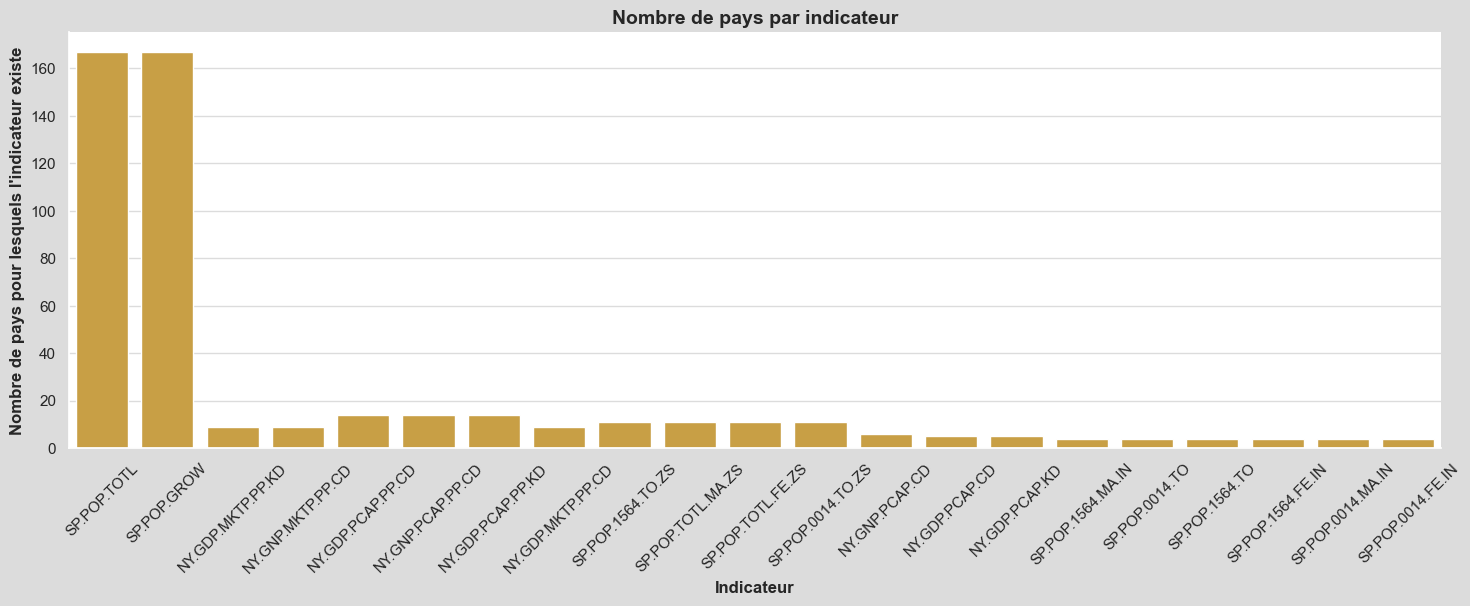

In [55]:
# number of countries for which one of the 21 indicators exists
sns.set(rc={'figure.figsize':(5, 15), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph12b = sns.catplot(data=country_series, x="cs_series_code", kind="count", color=tango,height=5, aspect=3, orient='h')
plt.title("Nombre de pays par indicateur", fontweight='bold', fontsize='14')
plt.xlabel('Indicateur', fontweight='bold', fontsize='12')
plt.xticks(rotation=45)
plt.ylabel("Nombre de pays pour lesquels l'indicateur existe", fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("12b.png", bbox_inches='tight')

- La distribution des indicateurs est tres inegale parmi les pays.

In [56]:
# remove empty column
country_series_trim = country_series[['cs_country_code', 'cs_series_code', 'cs_description']]
country_series_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 10 to 612
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cs_country_code  487 non-null    string
 1   cs_series_code   487 non-null    string
 2   cs_description   487 non-null    string
dtypes: string(3)
memory usage: 15.2 KB


In [57]:
country_series_trim.head()

cs_country_code cs_series_code  \
10             AGO    SP.POP.TOTL   
11             AGO    SP.POP.GROW   
12             ALB    SP.POP.GROW   
13             ALB    SP.POP.TOTL   
14             AND    SP.POP.TOTL   

                                              cs_description  
10  Data sources : United Nations World Population Prospects  
11   Data sources: United Nations World Population Prospects  
12   Data sources: United Nations World Population Prospects  
13          Data sources : Institute of Statistics, Eurostat  
14  Data sources : United Nations World Population Prospects

In [58]:
# check if indicators in table country_series_trim have definitions/descriptions in table series_trim
indic_cs = country_series['cs_series_code'].unique().tolist()
indic_cs_defs = series.loc[series['Series Code'].isin(indic_cs)][['Series Code', 'Topic', 'Indicator Name', 'Long definition',
                                                                  'Source']]
indic_cs_defs

Series Code  \
1660  NY.GDP.MKTP.PP.CD   
1661  NY.GDP.MKTP.PP.KD   
1662     NY.GDP.PCAP.CD   
1663     NY.GDP.PCAP.KD   
1664  NY.GDP.PCAP.PP.CD   
1665  NY.GDP.PCAP.PP.KD   
1667  NY.GNP.MKTP.PP.CD   
1668     NY.GNP.PCAP.CD   
1669  NY.GNP.PCAP.PP.CD   
2401  SP.POP.0014.FE.IN   
2402  SP.POP.0014.MA.IN   
2403     SP.POP.0014.TO   
2404  SP.POP.0014.TO.ZS   
2507  SP.POP.1564.FE.IN   
2508  SP.POP.1564.MA.IN   
2509     SP.POP.1564.TO   
2510  SP.POP.1564.TO.ZS   
2589        SP.POP.GROW   
2590        SP.POP.TOTL   
2592  SP.POP.TOTL.FE.ZS   
2594  SP.POP.TOTL.MA.ZS   

                                                                                             Topic  \
1660                                               Economic Policy & Debt: Purchasing power parity   
1661                                               Economic Policy & Debt: Purchasing power parity   
1662        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
1663  Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
1664                                               Economic Policy & Debt: Purchasing power parity   
1665                                               Economic Policy & Debt: Purchasing power parity   
1667                                               Economic Policy & Debt: Purchasing power parity   
1668                         Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
1669                                               Economic Policy & Debt: Purchasing power parity   
2401                                                                 Health: Population: Structure   
2402                                                                 Health: Population: Structure   
2403                                                                 Health: Population: Structure   
2404                                                                 Health: Population: Structure   
2507                                                                 Health: Population: Structure   
2508                                                                 Health: Population: Structure   
2509                                                                 Health: Population: Structure   
2510                                                                 Health: Population: Structure   
2589                                                                  Health: Population: Dynamics   
2590                                                                 Health: Population: Structure   
2592                                                                 Health: Population: Structure   
2594                                                                 Health: Population: Structure   

                                           Indicator Name  \
1660                   GDP, PPP (current international $)   
1661             GDP, PPP (constant 2011 international $)   
1662                         GDP per capita (current US$)   
1663                   GDP per capita (constant 2010 US$)   
1664        GDP per capita, PPP (current international $)   
1665  GDP per capita, PPP (constant 2011 international $)   
1667                   GNI, PPP (current international $)   
1668           GNI per capita, Atlas method (current US$)   
1669        GNI per capita, PPP (current international $)   
2401                         Population ages 0-14, female   
2402                           Population ages 0-14, male   
2403                          Population ages 0-14, total   
2404                    Population ages 0-14 (% of total)   
2507                        Population ages 15-64, female   
2508                          Population ages 15-64, male   
2509                         Population ages 15-64, total   
2510                   Population ages 15-64 (% of total)   
2589                         Population growth (annual %)   
2590         

- La table country_series contient des indicateurs demographiques et economiques potentiellement pertinents pour notre analyse ;
- En particulier, nous retiendrons les suivants au vu de leur definition: 'SP.POP.GROW', 'SP.POP.TOTL', 'NY.GNP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.CD', ainsi que SP.POP.TOTL et SP.POP.GROW (ces derniers existant dans cette table pour tous les pays).

In [59]:
# select relevant data
indic_cs_trim = ['SP.POP.GROW', 'SP.POP.TOTL', 'NY.GNP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.CD']
indic_cs_defs = series.loc[series['Series Code'].isin(indic_cs_trim)][['Series Code', 'Topic', 'Indicator Name',
                                                                       'Long definition', 'Source']]
indic_cs_defs.shape

(4, 5)

In [60]:
# typecasting
indic_cs_defs['Series Code'] = indic_cs_defs['Series Code'].astype('string')
indic_cs_defs['Topic'] = indic_cs_defs['Topic'].astype('string')
indic_cs_defs['Indicator Name'] = indic_cs_defs['Indicator Name'].astype('string')
indic_cs_defs['Long definition'] = indic_cs_defs['Long definition'].astype('string')
indic_cs_defs['Source'] = indic_cs_defs['Source'].astype('string')

# rename columns
indic_cs_defs.rename(columns={'Series Code': 'cs_series_code', 'Topic': 'cs_topic', 'Indicator Name':'cs_indicator_name',
                        'Long definition':'cs_long_definition', 'Source':'cs_source'}, inplace=True)

# check results
indic_cs_defs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1664 to 2590
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cs_series_code      4 non-null      string
 1   cs_topic            4 non-null      string
 2   cs_indicator_name   4 non-null      string
 3   cs_long_definition  4 non-null      string
 4   cs_source           4 non-null      string
dtypes: string(5)
memory usage: 192.0 bytes


In [61]:
# export clean df for further analyses
indic_cs_defs.to_csv('series_cs.csv', index=False, encoding='latin_1')

## 1.3. EdStatsData.csv

### 1.3.1 Import & describe

In [62]:
data.shape

(886930, 70)

In [63]:
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                            Indicator Name  \
0             Adjusted net enrolment rate, lower secondary, both sexes (%)   
1                 Adjusted net enrolment rate, lower secondary, female (%)   
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3                   Adjusted net enrolment rate, lower secondary, male (%)   
4                     Adjusted net enrolment rate, primary, both sexes (%)   

   Indicator Code       1970       1971       1972       1973       1974  \
0      UIS.NERA.2        NaN        NaN        NaN        NaN        NaN   
1    UIS.NERA.2.F        NaN        NaN        NaN        NaN        NaN   
2  UIS.NERA.2.GPI        NaN        NaN        NaN        NaN        NaN   
3    UIS.NERA.2.M        NaN        NaN        NaN        NaN        NaN   
4     SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138   

       1975  ...  2060  2065  2070  2075  2080  2085  2090  2095  2100  \
0       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Unnamed: 69  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 70 columns]

In [64]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [66]:
data.describe(include=[object])

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                                      Indicator Name  \
count                                                         886930   
unique                                                          3665   
top     Adjusted net enrolment rate, lower secondary, both sexes (%)   
freq                                                             242   

       Indicator Code  
count          886930  
unique           3665  
top        UIS.NERA.2  
freq              242

In [67]:
data.describe(include=[np.number])

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [68]:
# check for duplicates
data_dup = data.loc[data.duplicated() == True]
data_dup.shape[0]

0

- La table ne contient pas de valeurs dupliquees.

<AxesSubplot:>

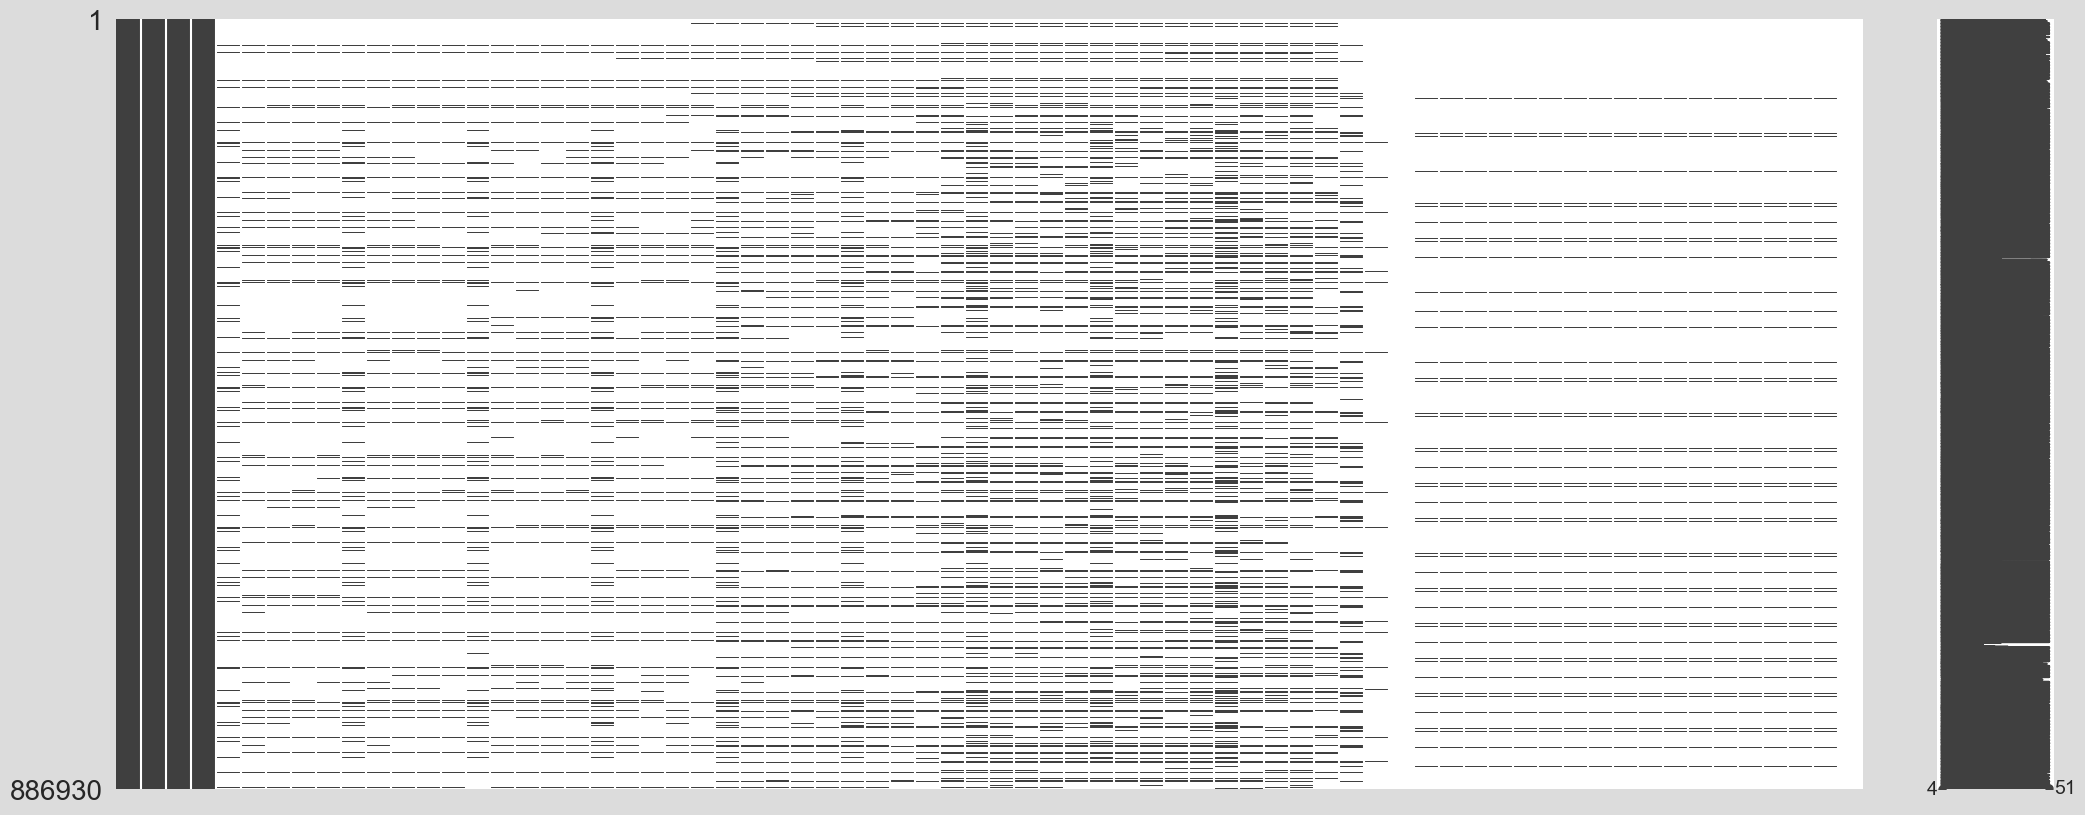

In [69]:
# map missing data
msno.matrix(data)

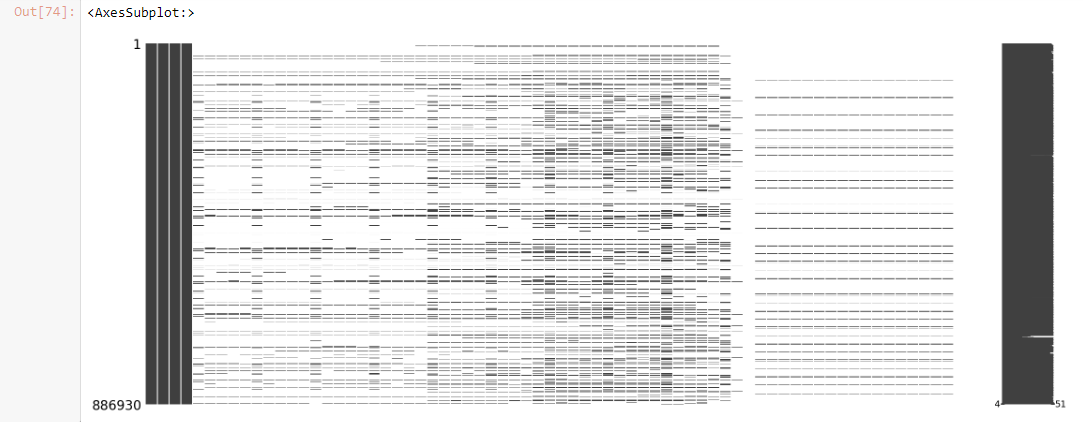

In [70]:
# calculate % of nulls in entire dataframe
data_nulls_pct = data.isna().sum().sum() / (data.shape[0]*data.shape[1]/100)
print(round(data_nulls_pct,2), '% de valeurs manquantes dans la table')

86.1 % de valeurs manquantes dans la table


### 1.3.2 Explore, clean & export

In [71]:
in_countries_not_data = isInList(final_country_list, data['Country Code'].unique())
in_countries_not_data

[]

- Aucun des 167 pays presents dans la table countries_trim n'est absent de la table data.

In [72]:
in_data_not_countries = isInList(data['Country Code'].unique(), final_country_list)
len(in_data_not_countries)

75

- 75 Country Codes presents dans la table data sont absents de la table countries_trim.

In [73]:
idnc = country.loc[country['Country Code'].isin(in_data_not_countries)][['Country Code', 'Short Name', 'Region',
                                                                         'Income Group']]
idnc.head(60)

Country Code                                      Short Name  \
0            ABW                                           Aruba   
1            AFG                                     Afghanistan   
5            ARB                                      Arab World   
9            ASM                                  American Samoa   
35           CHI                                 Channel Islands   
47           CUW                                         Curaçao   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
64           ERI                                         Eritrea   
68           EUU                                  European Union   
72           FRO                                  Faeroe Islands   
73           FSM                                      Micronesia   
78           GIB                                       Gibraltar   
85           GRL                                       Greenland   
87           GUM                                            Guam   
89           HIC                                     High income   
90           HKG                            Hong Kong SAR, China   
92           HPC          Heavily indebted poor countries (HIPC)   
94           HTI                                           Haiti   
97           IMN                                     Isle of Man   
100          IRN                                            Iran   
103          ISR                                          Israel   
112          KIR                                        Kiribati   
113          KNA                             St. Kitts and Nevis   
116          LAC     Latin America & Caribbean (developing only)   
121          LCA                                       St. Lucia   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
133          MAC                                Macao SAR, China   
134          MAF                        St. Martin (French part)   
139          MDV                                        Maldives   
140          MEA  Middle East & North Africa (all income levels)   
142          MHL                                Marshall Islands   
143          MIC                                   Middle income   
147          MMR                                         Myanmar   
148          MNA    Middle East & North Africa (developing only)   
151          MNP                        Northern Mariana Islands   
157          NAC                                   North America   
159          NCL                                   New Caledonia   
166          NRU                                           Nauru   
168          OED                                    OECD members   
174          PLW                                           Palau   
175          PNG                                Papua New Guinea   
177          PRI                                     Puerto Rico   
178          PRK                        Dem. People's Rep. Korea   
181          PSE                              West Bank and Gaza   
182          PYF                                French Polynesia   
185          RUS                                          Russia   
187          SAS                                      South Asia   
192          SLB                                 Solomon Islands   
198          SSA            Sub-Saharan Africa (developing only)   
199          SSD                                     South S

In [74]:
idnc.tail(15)

Country Code                      Short Name                      Region  \
201          STP           São Tomé and Principe          Sub-Saharan Africa   
207          SXM       Sint Maarten (Dutch part)   Latin America & Caribbean   
208          SYC                      Seychelles          Sub-Saharan Africa   
209          SYR            Syrian Arab Republic  Middle East & North Africa   
210          TCA        Turks and Caicos Islands   Latin America & Caribbean   
216          TLS                     Timor-Leste         East Asia & Pacific   
218          TTO             Trinidad and Tobago   Latin America & Caribbean   
224          UKR                         Ukraine       Europe & Central Asia   
225          UMC             Upper middle income                         NaN   
229          VCT  St. Vincent and the Grenadines   Latin America & Caribbean   
231          VIR                  Virgin Islands   Latin America & Caribbean   
233          VUT                         Vanuatu         East Asia & Pacific   
234          WLD                           World                         NaN   
235          WSM                           Samoa         East Asia & Pacific   
237          YEM                           Yemen  Middle East & North Africa   

             Income Group  
201   Lower middle income  
207  High income: nonOECD  
208   Upper middle income  
209   Lower middle income  
210  High income: nonOECD  
216   Lower middle income  
218  High income: nonOECD  
224   Lower middle income  
225                   NaN  
229   Upper middle income  
231  High income: nonOECD  
233   Lower middle income  
234                   NaN  
235   Lower middle income  
237   Lower middle income

- Les 75 Country Codes presents dans la table data mais absents de la table countries_trim correspondent a des pays que nous avons exclus de l'analyse pour des raisons geopolitiques, ou a des groupements de pays que nous avons egalement retires de la table countries_trim.

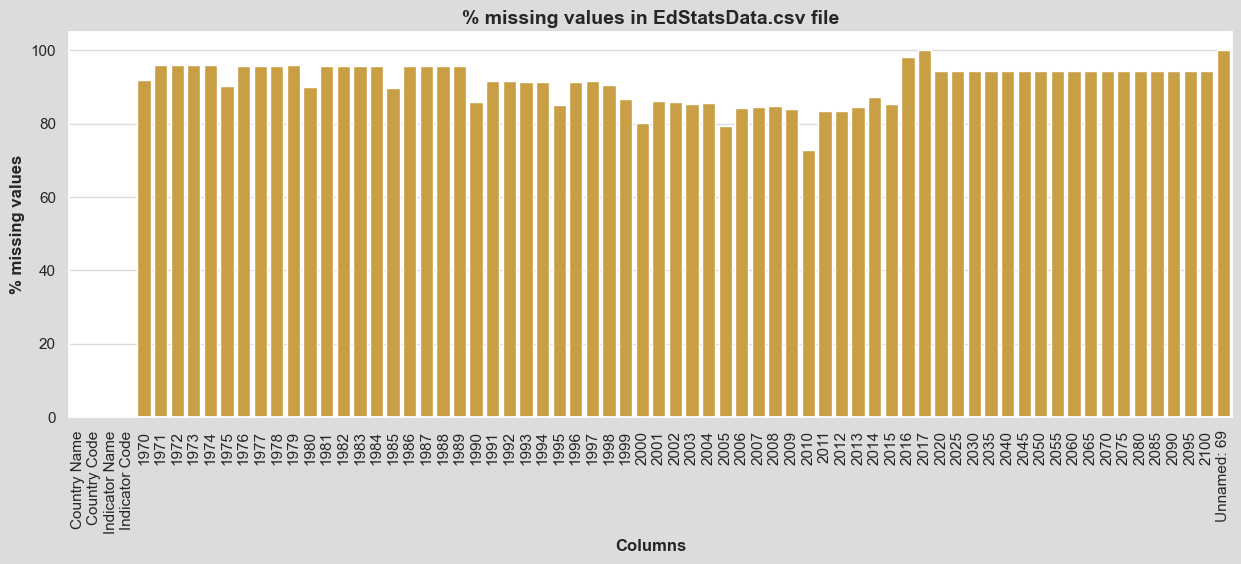

In [75]:
data_nulls = pd.DataFrame(data.isnull().mean() * 100).reset_index()
data_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)

# plot % of missing values
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph3 = sns.barplot(data = data_nulls, x='Column', y='% missing values', color=tango)
plt.title('% missing values in EdStatsData.csv file', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("data_missing_values.png", bbox_inches='tight')

- Les 4 premieres colonnes du fichier ne contiennent ausune valeur manquante. La derniere colonne est entierement vide, il conviendra de la supprimer;
- Les donnees a partir de 2020 sont espacees de 5 ans et remplies regulierement : il s'agit vraisemblablement de colonnes de prediction ;
- Les donnees historiques presentent un nombre de valeurs manquantes moindre tous les 5 ans ; cet intervalle de 5 ans coincidant de surcroit avec l'intervalle auquel les donnees predites sont donnees, nous ne conserverons en premier lieu dans le fichier que les annees historiques presentant un "pic" d'information disponible, a savoir 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010 et 2015.

In [76]:
data_trim = data.loc[data['Country Code'].isin(final_country_list)][['Country Name', 'Country Code', 'Indicator Name', 
                                                                         'Indicator Code', '1970','1975','1980','1985',
                                                                         '1990','1995','2000','2005','2010','2015', '2020',
                                                                         '2025', '2030', '2035', '2040', '2045', '2050',
                                                                         '2055', '2060', '2065', '2070', '2075', '2080',
                                                                         '2085', '2090','2095', '2100']]

# rename columns
data_trim.rename(columns={'Country Name': 'd_country_name', 'Country Code': 'd_country_code',
                          'Indicator Name':'d_indicator_name', 'Indicator Code':'d_indicator_code'}, inplace=True)

# typecasting
data_trim['d_country_name'] = data_trim['d_country_name'].astype('string')
data_trim['d_country_code'] = data_trim['d_country_code'].astype('string')
data_trim['d_indicator_name'] = data_trim['d_indicator_name'].astype('string')
data_trim['d_indicator_code'] = data_trim['d_indicator_code'].astype('string')

# check results
data_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612055 entries, 95290 to 886929
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   d_country_name    612055 non-null  string 
 1   d_country_code    612055 non-null  string 
 2   d_indicator_name  612055 non-null  string 
 3   d_indicator_code  612055 non-null  string 
 4   1970              60948 non-null   float64
 5   1975              74432 non-null   float64
 6   1980              75375 non-null   float64
 7   1985              75996 non-null   float64
 8   1990              104866 non-null  float64
 9   1995              110781 non-null  float64
 10  2000              146831 non-null  float64
 11  2005              153534 non-null  float64
 12  2010              204799 non-null  float64
 13  2015              111475 non-null  float64
 14  2020              44352 non-null   float64
 15  2025              44352 non-null   float64
 16  2030            

In [77]:
# number of indicators
data_trim['d_indicator_code'].nunique()

3665

In [78]:
# export clean df for further analyses
data_trim.to_csv('data_trim.csv', index=False, encoding='utf8')

## 1.4. EdStatsSeries.csv

### 1.4.1 Import & describe

In [79]:
series.shape

(3665, 21)

In [80]:
series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   
2    Barro-Lee: Percentage of female population age 15+ with no education   
3           Barro-Lee: Percentage of population age 15+ with no education   
4  Barro-Lee: Percentage of female population age 20-24 with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   
3           Percentage of population age 15+ with no education   
4  Percentage of female population age 20-24 with no education   

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   
3           Percentage of population age 15+ with no education   
4  Percentage of female population age 20-24 with no education   

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0              NaN         NaN         NaN         NaN                NaN   
1              NaN         NaN         NaN         NaN                NaN   
2              NaN         NaN         NaN         NaN                NaN   
3              NaN         NaN         NaN         NaN                NaN   
4              NaN         NaN         NaN         NaN                NaN   

   ... Notes from original source  General comments  \
0  ...                        NaN               NaN   
1  ...                        NaN               NaN   
2  ...                        NaN               NaN   
3  ...                        NaN               NaN   
4  ...                        NaN               NaN   

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
3  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
4  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [81]:
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [82]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [83]:
series.describe(include=[np.number])

Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                         NaN              NaN   
50%                NaN                         NaN              NaN   
75%                NaN                         NaN              NaN   
max                NaN                         NaN              NaN   

       Related indicators  License Type  Unnamed: 20  
count                 0.0           0.0          0.0  
mean                  NaN           NaN          NaN  
std                   NaN           NaN          NaN  
min                   NaN           NaN          NaN  
25%                   NaN           NaN          NaN  
50%                   NaN           NaN          NaN  
75%                   NaN           NaN          NaN  
max                   NaN           NaN          NaN

In [84]:
series.describe(include=[object])

Series Code              Topic  \
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   

                                                                Indicator Name  \
count                                                                     3665   
unique                                                                    3665   
top     Barro-Lee: Percentage of female population age 15-19 with no education   
freq                                                                         1   

                                                                                                                                                         Short definition  \
count                                                                                                                                                                2156   
unique                                                                                                                                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm   
freq                                                                                                                                                                  215   

                                                                                                                                                          Long definition  \
count                                                                                                                                                                3665   
unique                                                                                                                                                               2060   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm   
freq                                                                                                                                                                  215   

       Periodicity                 Base Period Other notes Aggregation method  \
count           99                         314         552                 47   
unique           1                           4          14                  3   
top         Annual  Projections (2010 to 2100)        EGRA   Weighted average   
freq            99                         308         403                 31   

                                                    Limitations and exceptions  \
count                                                                       14   
unique                                                                       9   
top     Data should be used cautiously because of differences in age coverage.   
freq                                                                         3   

                                                                                                                                                                                            General comments  \
count                                                                                                                                                                                                     14   
unique                                                                                                                                                                                                     8   
top     When NEET rates are available for more than two age groups in a given year, one value for persons ages 15 to 29 is taken, considering that not all people complete their educ

- La table series contient 3,665 indicateurs uniques repartis en 37 sujets distincts.

In [85]:
# check for duplicates
series_dup = series.loc[series.duplicated() == True]
series_dup.shape[0]

0

- La table ne contient pas de valeurs dupliquees.

<AxesSubplot:>

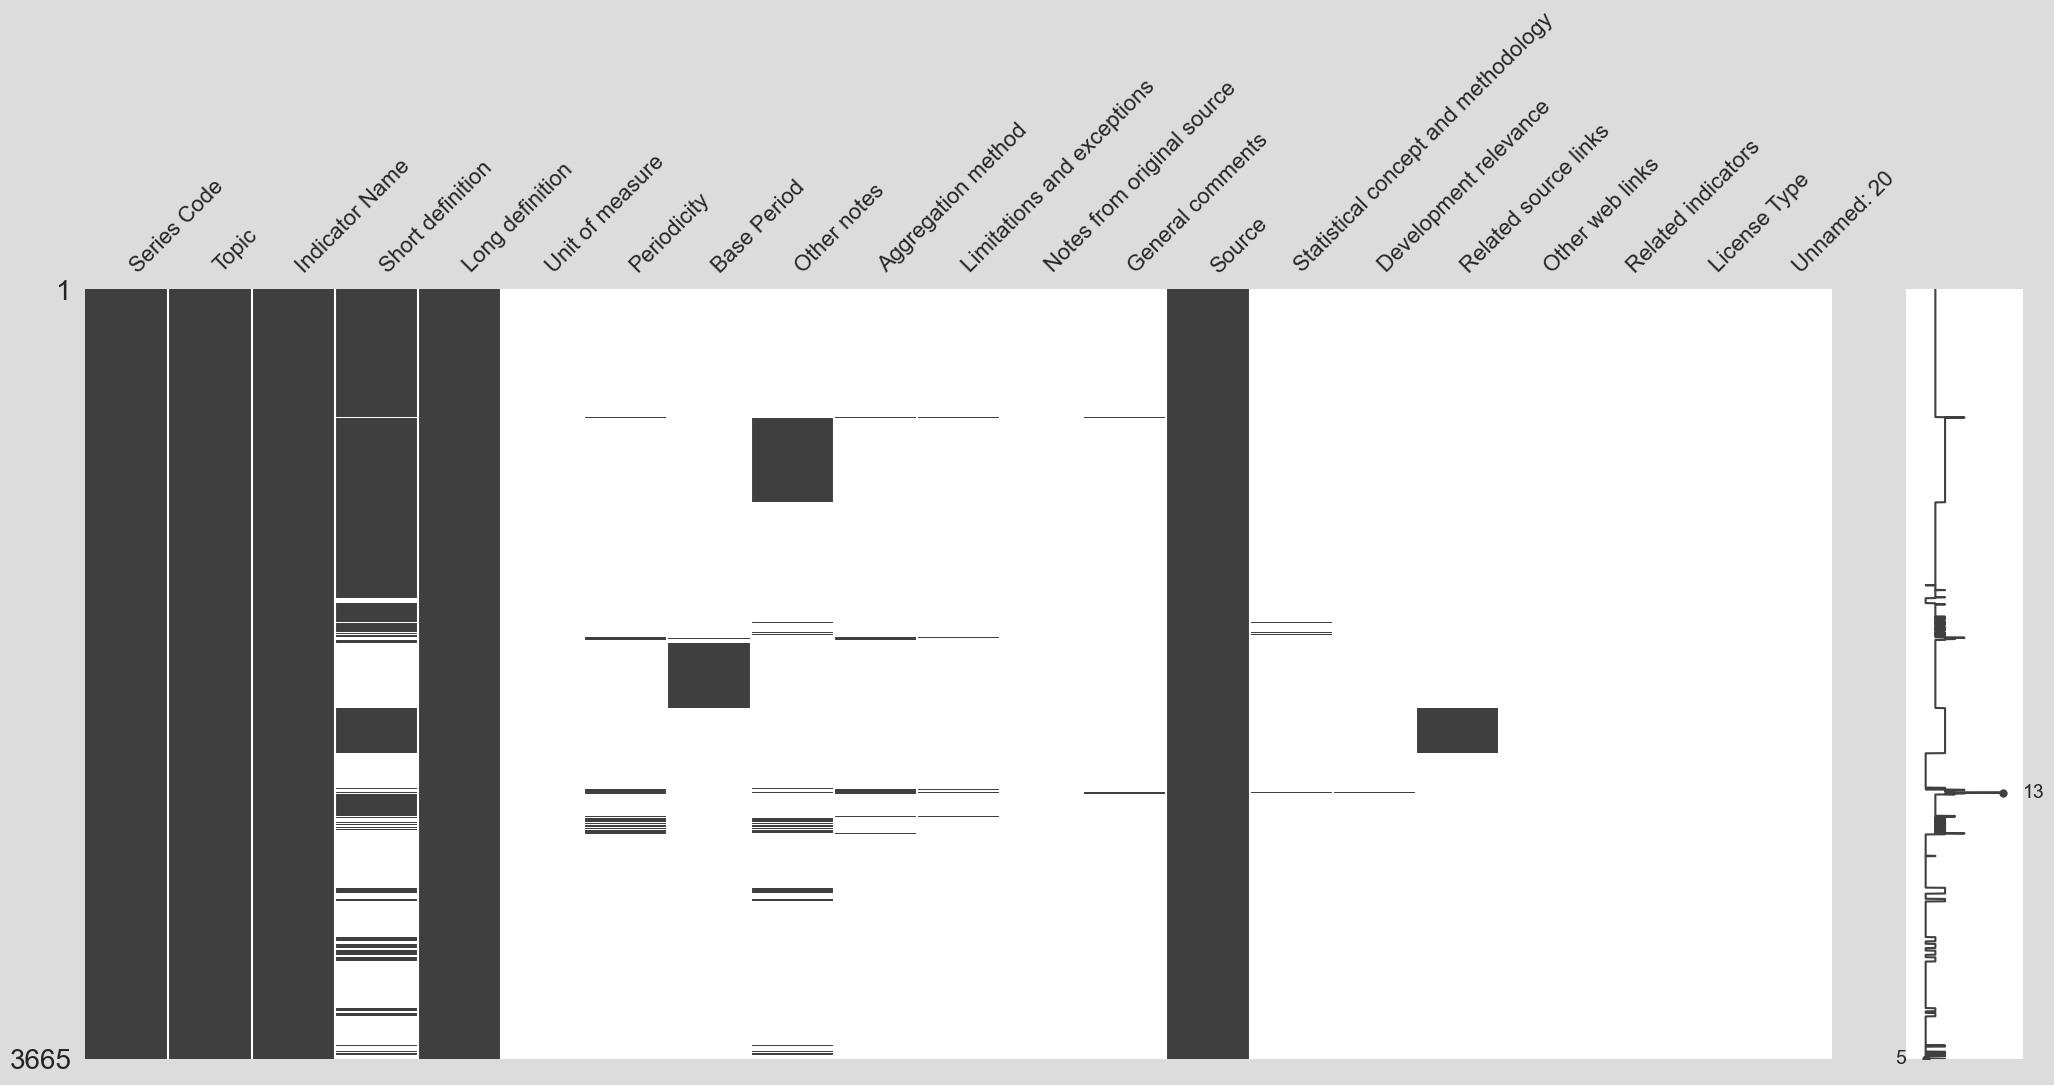

In [86]:
# map missing data
msno.matrix(series)

In [87]:
# calculate % of nulls in entire dataframe
series_nulls_pct = series.isna().sum().sum() / (series.shape[0]*series.shape[1]/100)
print(round(series_nulls_pct,2), '% de valeurs manquantes dans la table')

71.72 % de valeurs manquantes dans la table


- 5 colonnes seulement sont integralement renseignees ('Series Code', 'Topic', 'Indicator Name', 'Long definition' et 'Source') et 6 sont completement vides ('Unit of measure', 'Notes from original source','Other web links', 'Related indicators', 'License Type' et 'Unnamed: 20'), les taux de remplissage des autres colonnes etant relativement faibles en moyenne (<30%).

### 1.4.2 Explore, clean & export

#### 1.4.2.1 Explore

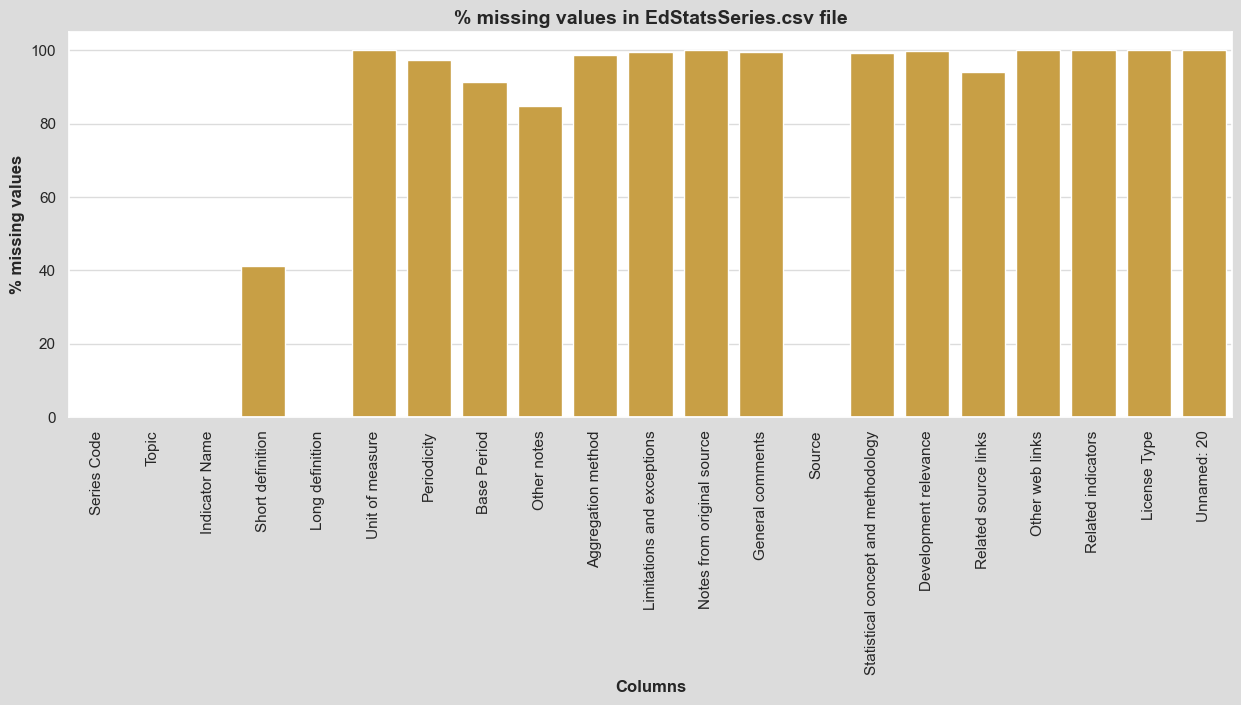

In [88]:
series_nulls = pd.DataFrame(series.isnull().mean() * 100).reset_index()
series_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)

# plot % of missing values
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph15a = sns.barplot(data = series_nulls, x='Column', y='% missing values', color=tango)
plt.title('% missing values in EdStatsSeries.csv file', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("15a.png", bbox_inches='tight')

In [89]:
series['Topic'].unique().tolist()

['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Autonomy and Accountability (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Health: Mortality',
 'Social Protection & Labor: Labor f

In [90]:
series['Periodicity'].unique()

array([nan, 'Annual'], dtype=object)

- Tous les indicateurs pour lesquels cette information est renseignee ont une periodicite annuelle.

In [91]:
series['Base Period'].unique()

array([nan, '2010', '2011', 'Projections (2010 to 2100)', '14'],
      dtype=object)

In [92]:
indic_by_theme = series.groupby('Topic')['Series Code'].nunique().sort_values(ascending=False).reset_index()
indic_by_theme

Topic  \
0                                                                              Learning Outcomes   
1                                                                                     Attainment   
2                                                                             Education Equality   
3                                                                                      Secondary   
4                                                                                        Primary   
5                                                                                     Population   
6                                                                                       Tertiary   
7                                                                                       Teachers   
8                                                                                   Expenditures   
9                                                            Engaging the Private Sector (SABER)   
10                                                                                      Literacy   
11                                                                              Teachers (SABER)   
12                                                    School Autonomy and Accountability (SABER)   
13                                                                     Early Childhood Education   
14                                              Education Management Information Systems (SABER)   
15                                                                   Post-Secondary/Non-Tertiary   
16                                                                        School Finance (SABER)   
17                                                                    Tertiary Education (SABER)   
18                                                                    Student Assessment (SABER)   
19                                                                                   Pre-Primary   
20                                                                 Health: Population: Structure   
21                                                                 Workforce Development (SABER)   
22                                                               Early Child Development (SABER)   
23                                              Social Protection & Labor: Labor force structure   
24                                                      School Health and School Feeding (SABER)   
25                                               Economic Policy & Debt: Purchasing power parity   
26                                                       Social Protection & Labor: Unemployment   
27        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
28                                                                                         Laber   
29                                                                                    Background   
30                                                                Infrastructure: Communications   
31  Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
32                                                                                          EMIS   
33                                                                          Health: Risk factors   
34                                                                  Health: Population: Dynamics   
35                                                                             Health: Mortality   
36                         Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   

    Series Code  
0          1046  
1           733  
2           426  
3           256  
4           248  
5           213  
6           158  
7           137  
8            93  
9            51  
10           32  
11           29  
12           29  
13           24  
14           23  
15

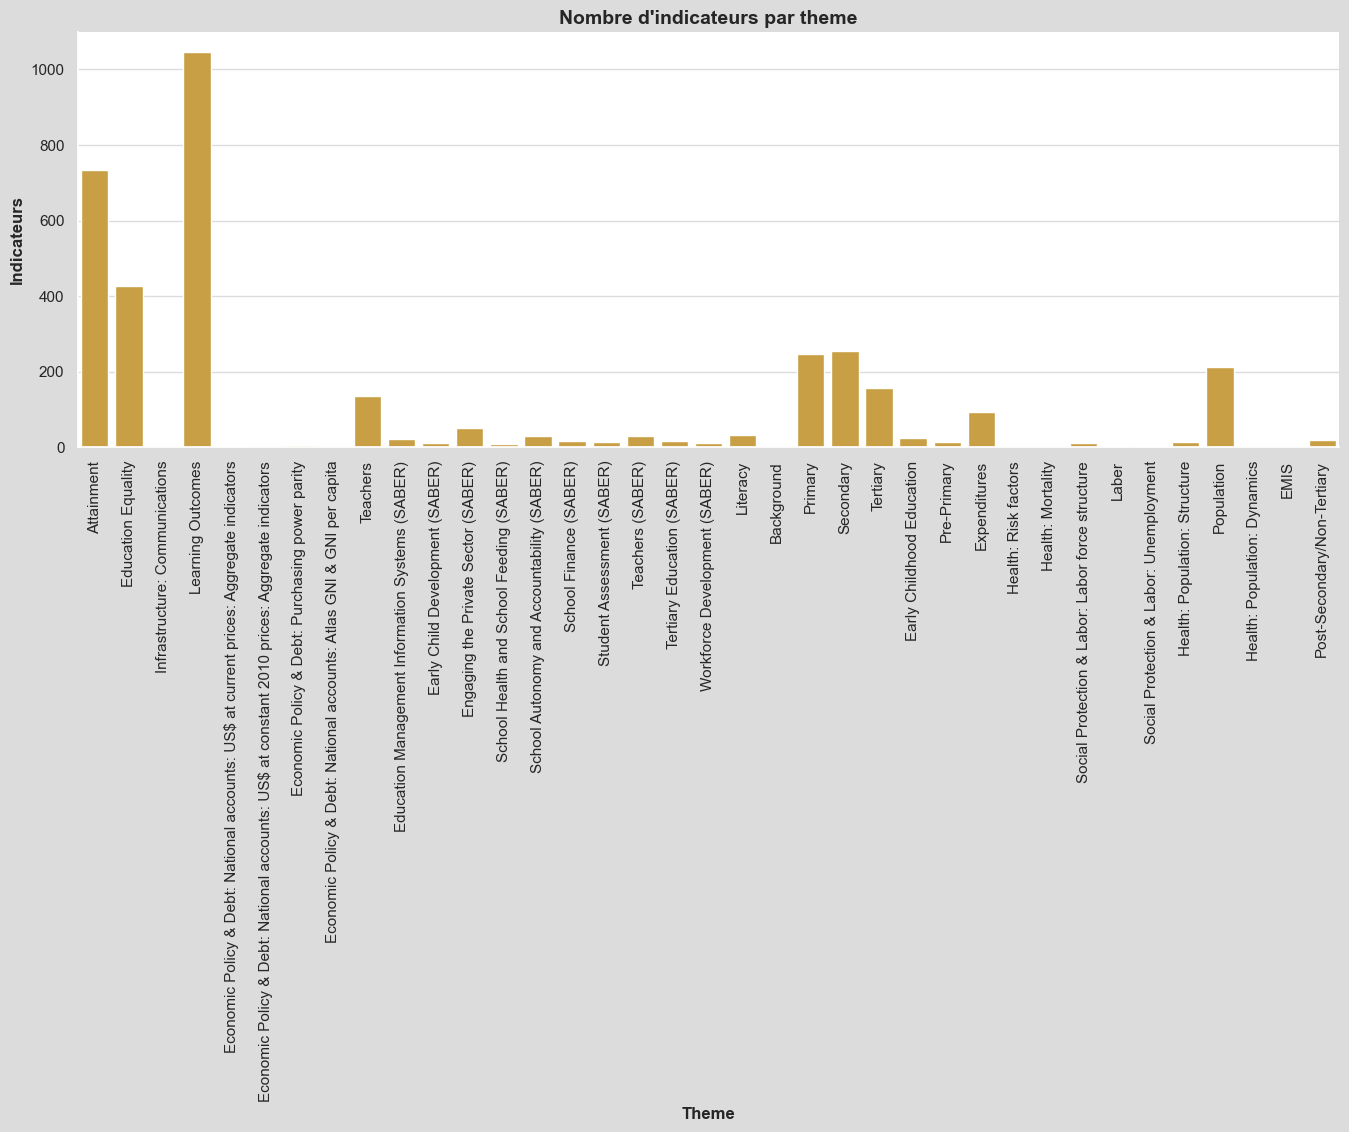

In [93]:
# graph number of indicators by theme
sns.set(rc={'figure.figsize':(5, 15), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph15b = sns.catplot(data=series, x="Topic", kind="count", color=tango,height=5, aspect=3, orient='h')
plt.title("", fontweight='bold', fontsize='14')
plt.xlabel('Theme', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel("Indicateurs", fontweight='bold', fontsize='12')
plt.title("Nombre d'indicateurs par theme", fontweight='bold', fontsize='14')
plt.grid(axis='y', color='gainsboro')
plt.savefig("15b.png", bbox_inches='tight')

In [94]:
# remove empty or mortly empty columns
series_trim = series[['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source']].copy()

# rename columns
series_trim.rename(columns={'Series Code': 's_series_code', 'Topic': 's_topic',
                          'Indicator Name':'s_indicator_name', 'Long definition':'s_long_definition', 'Source':'s_source'},
                 inplace=True)

# typecasting
series_trim['s_series_code'] = series_trim['s_series_code'].astype('string')
series_trim['s_topic'] = series_trim['s_topic'].astype('string')
series_trim['s_indicator_name'] = series_trim['s_indicator_name'].astype('string')
series_trim['s_long_definition'] = series_trim['s_long_definition'].astype('string')
series_trim['s_source'] = series_trim['s_source'].astype('string')

# check result
series_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   s_series_code      3665 non-null   string
 1   s_topic            3665 non-null   string
 2   s_indicator_name   3665 non-null   string
 3   s_long_definition  3665 non-null   string
 4   s_source           3665 non-null   string
dtypes: string(5)
memory usage: 143.3 KB


#### 1.4.2.2 Select relevant themes & indicators

#### 1.4.2.2 a - Historical indicators

- La repartition du nombre d'indicateurs par theme est tres inegale (de 1 a plus de 1,000);
- Tous les themes ne sont pas pertinents pour notre analyse, sur les 37 nous en retiendrons 9 dont nous explorerons les indicateurs disponibles: 'Attainment', 'Education Equality', 'Infrastructure: Communications', 'Learning Outcomes', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita','Secondary', 'Tertiary', 'Population' et 'Literacy'.

In [95]:
topics_list = ["Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita", "Infrastructure: Communications",
               'Tertiary', 'Population','Secondary','Education Equality', 'Attainment', 'Learning Outcomes', 'Literacy']
len(topics_list)

9

In [96]:
indic_hist = []

##### * Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita

In [97]:
# analyse GNI per Capita indicator
gni = series_trim.loc[series_trim['s_topic'] == topics_list[0]]
gni

s_series_code  \
1668  NY.GNP.PCAP.CD   

                                                                    s_topic  \
1668  Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   

                                s_indicator_name  \
1668  GNI per capita, Atlas method (current US$)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          s_long_definition  \
1668  GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates of inflation between the country, and through 2000, the G-5 countries (France, Germany, Japan, the United Kingdom, and the United States). From 2001, these countries include the Euro area, Japan, the United Kingdom, and the United States.   

                                                                       s_source  
1668  World Bank national accounts data, and OECD National Accounts data files.

- NY.GNP.PCAP.CD est un indicateur de developpement important pour notre analyse (revenu brut national par habitant converti en USD), il est donc ajoute a la liste des indicateurs qui seront utilises. 

In [98]:
indic_hist.append('NY.GNP.PCAP.CD')
indic_hist

['NY.GNP.PCAP.CD']

##### * Infrastructure: Communications

In [99]:
# analyse infrastructure and communications indicators
coms = series_trim.loc[series_trim['s_topic'] == topics_list[1]]
coms

s_series_code                         s_topic  \
610  IT.CMP.PCMP.P2  Infrastructure: Communications   
611  IT.NET.USER.P2  Infrastructure: Communications   

                        s_indicator_name  \
610  Personal computers (per 100 people)   
611      Internet users (per 100 people)   

                                                                                                                                                                                                         s_long_definition  \
610                                                                                                                            Personal computers are self-contained computers designed to be used by a single individual.   
611  Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.   

                                                                                                s_source  
610  International Telecommunication Union, World Telecommunication/ICT Development Report and database.  
611  International Telecommunication Union, World Telecommunication/ICT Development Report and database.

- Ces 2 indicateurs sont pertinents pour notre analyse, nous les ajoutons a la liste des indicateurs retenus.

In [100]:
indic_hist.extend(['IT.CMP.PCMP.P2','IT.NET.USER.P2'])
indic_hist

['NY.GNP.PCAP.CD', 'IT.CMP.PCMP.P2', 'IT.NET.USER.P2']

##### * Tertiary

In [101]:
# analyse Tertiary topic
ter = series_trim.loc[series_trim['s_topic'] == topics_list[2]]
ter.head(60)

s_series_code   s_topic  \
2220     SE.ENR.TERT.FM.ZS  Tertiary   
2284           SE.SCH.LIFE  Tertiary   
2285        SE.SCH.LIFE.FE  Tertiary   
2286        SE.SCH.LIFE.MA  Tertiary   
2329     SE.TER.CMPL.FE.ZS  Tertiary   
2330     SE.TER.CMPL.MA.ZS  Tertiary   
2331        SE.TER.CMPL.ZS  Tertiary   
2332           SE.TER.ENRL  Tertiary   
2333        SE.TER.ENRL.FE  Tertiary   
2334     SE.TER.ENRL.FE.ZS  Tertiary   
2335           SE.TER.ENRR  Tertiary   
2336        SE.TER.ENRR.FE  Tertiary   
2337        SE.TER.ENRR.MA  Tertiary   
2338           SE.TER.GRAD  Tertiary   
2339  SE.TER.GRAD.AG.FE.ZS  Tertiary   
2340     SE.TER.GRAD.AG.ZS  Tertiary   
2341  SE.TER.GRAD.ED.FE.ZS  Tertiary   
2342     SE.TER.GRAD.ED.ZS  Tertiary   
2343  SE.TER.GRAD.EN.FE.ZS  Tertiary   
2344     SE.TER.GRAD.EN.ZS  Tertiary   
2345        SE.TER.GRAD.FE  Tertiary   
2346  SE.TER.GRAD.FE.AG.ZS  Tertiary   
2347  SE.TER.GRAD.FE.ED.ZS  Tertiary   
2348  SE.TER.GRAD.FE.EN.ZS  Tertiary   
2349  SE.TER.GRAD.FE.HL.ZS  Tertiary   
2350  SE.TER.GRAD.FE.HU.ZS  Tertiary   
2351  SE.TER.GRAD.FE.OT.ZS  Tertiary   
2352  SE.TER.GRAD.FE.SC.ZS  Tertiary   
2353  SE.TER.GRAD.FE.SS.ZS  Tertiary   
2354  SE.TER.GRAD.FE.SV.ZS  Tertiary   
2355     SE.TER.GRAD.FE.ZS  Tertiary   
2356  SE.TER.GRAD.HL.FE.ZS  Tertiary   
2357     SE.TER.GRAD.HL.ZS  Tertiary   
2358  SE.TER.GRAD.HU.FE.ZS  Tertiary   
2359     SE.TER.GRAD.HU.ZS  Tertiary   
2360  SE.TER.GRAD.OT.FE.ZS  Tertiary   
2361     SE.TER.GRAD.OT.ZS  Tertiary   
2362  SE.TER.GRAD.SC.FE.ZS  Tertiary   
2363     SE.TER.GRAD.SC.ZS  Tertiary   
2364  SE.TER.GRAD.SS.FE.ZS  Tertiary   
2365     SE.TER.GRAD.SS.ZS  Tertiary   
2366  SE.TER.GRAD.SV.FE.ZS  Tertiary   
2367     SE.TER.GRAD.SV.ZS  Tertiary   
2368        SE.TER.PRIV.ZS  Tertiary   
2372           SE.TOT.ENRR  Tertiary   
2835               UIS.E.4  Tertiary   
2836             UIS.E.4.F  Tertiary   
2839            UIS.E.4.Pu  Tertiary   
2840          UIS.E.4.Pu.F  Tertiary   
2841             UIS.E.5.B  Tertiary   
2842           UIS.E.5.B.F  Tertiary   
2843               UIS.E.6  Tertiary   
2844             UIS.E.6.F  Tertiary   
2845               UIS.E.7  Tertiary   
2846             UIS.E.7.F  Tertiary   
2847               UIS.E.8  Tertiary   
2848             UIS.E.8.F  Tertiary   
2929             UIS.FEP.4  Tertiary   
2932           UIS.FEP.5.B  Tertiary   
2933       UIS.FEP.56.F140  Tertiary   

                                                                                                                               s_indicator_name  \
2220                                                                                 Gross enrolment ratio, tertiary, gender parity index (GPI)   
2284                                                                            School life expectancy, primary to tertiary, both sexes (years)   
2285                                                                                School life expectancy, primary to tertiary, female (years)   
2286                                                                                  School life expectancy, primary to tertiary, male (years)   
2329                                      Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, female (%)   
2330                                        Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%)   
2331                                  Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)   
2332                                                                       Enrolment in tertiary education, all programmes, both sexes (number)   
2333                                                                           Enrolment in tertiary education, all programmes, female (number)   
2334                                                                            Percentage of students

In [102]:
ter.iloc[61:99]

s_series_code   s_topic  \
2935        UIS.FEP.56.F300  Tertiary   
2936        UIS.FEP.56.F400  Tertiary   
2937        UIS.FEP.56.F500  Tertiary   
2938        UIS.FEP.56.F600  Tertiary   
2939        UIS.FEP.56.F700  Tertiary   
2940        UIS.FEP.56.F800  Tertiary   
2941     UIS.FEP.56.FOREIGN  Tertiary   
2942         UIS.FEP.56.FUK  Tertiary   
2943              UIS.FEP.6  Tertiary   
2944              UIS.FEP.7  Tertiary   
2945              UIS.FEP.8  Tertiary   
2946            UIS.FGP.5.B  Tertiary   
2947     UIS.FGP.56.F400500  Tertiary   
2948  UIS.FGP.56.FNON400500  Tertiary   
2949              UIS.FGP.6  Tertiary   
2950              UIS.FGP.7  Tertiary   
2951              UIS.FGP.8  Tertiary   
2956      UIS.FOSEP.56.F140  Tertiary   
2957    UIS.FOSEP.56.F140.F  Tertiary   
2958    UIS.FOSEP.56.F140.M  Tertiary   
2959      UIS.FOSEP.56.F200  Tertiary   
2960    UIS.FOSEP.56.F200.F  Tertiary   
2961    UIS.FOSEP.56.F200.M  Tertiary   
2962      UIS.FOSEP.56.F300  Tertiary   
2963    UIS.FOSEP.56.F300.F  Tertiary   
2964    UIS.FOSEP.56.F300.M  Tertiary   
2965      UIS.FOSEP.56.F400  Tertiary   
2966    UIS.FOSEP.56.F400.F  Tertiary   
2967    UIS.FOSEP.56.F400.M  Tertiary   
2968      UIS.FOSEP.56.F500  Tertiary   
2969    UIS.FOSEP.56.F500.F  Tertiary   
2970    UIS.FOSEP.56.F500.M  Tertiary   
2971      UIS.FOSEP.56.F600  Tertiary   
2972    UIS.FOSEP.56.F600.F  Tertiary   
2973    UIS.FOSEP.56.F600.M  Tertiary   
2974      UIS.FOSEP.56.F700  Tertiary   
2975    UIS.FOSEP.56.F700.F  Tertiary   
2976    UIS.FOSEP.56.F700.M  Tertiary   

                                                                                                                        s_indicator_name  \
2935            Percentage of students enrolled in Social Sciences, Business and Law programmes in tertiary education who are female (%)   
2936                                      Percentage of students enrolled in Science programmes in tertiary education who are female (%)   
2937  Percentage of students enrolled in Engineering, Manufacturing and Construction programmes in tertiary education who are female (%)   
2938                                  Percentage of students enrolled in Agriculture programmes in tertiary education who are female (%)   
2939                           Percentage of students enrolled in Health and Welfare programmes in tertiary education who are female (%)   
2940                                     Percentage of students enrolled in Services programmes in tertiary education who are female (%)   
2941             Percentage of all inbound internationally mobile students in tertiary education in the host country who are female, (%)   
2942                        Percentage of students enrolled in programmes in unspecified fields in tertiary education who are female (%)   
2943                                                            Percentage of students in tertiary ISCED 6 programmes who are female (%)   
2944                                                            Percentage of students in tertiary ISCED 7 programmes who are female (%)   
2945                                                            Percentage of students in tertiary ISCED 8 programmes who are female (%)   
2946                                                         Percentage of graduates from tertiary ISCED 5 programmes who are female (%)   
2947                             Percentage of graduates from Science and Technology programmes in tertiary education who are female (%)   
2948                         Percentage of graduates from non-science and non-technology fields in tertiary education who are female (%)   
2949                                                         Percentage of graduates from tertiary ISCED 6 programmes who are female (%)   
2950                                                         Percentage of graduates from tertiary ISCED 7 programmes who are female (%)   
2951                              

In [103]:
ter.tail(60)

s_series_code   s_topic  \
2976  UIS.FOSEP.56.F700.M  Tertiary   
2977    UIS.FOSEP.56.F800  Tertiary   
2978  UIS.FOSEP.56.F800.F  Tertiary   
2979  UIS.FOSEP.56.F800.M  Tertiary   
2980     UIS.FOSEP.56.FUK  Tertiary   
2981   UIS.FOSEP.56.Fuk.F  Tertiary   
2982   UIS.FOSEP.56.FUK.M  Tertiary   
2983  UIS.FOSGP.56.F140.M  Tertiary   
2984  UIS.FOSGP.56.F200.M  Tertiary   
2985  UIS.FOSGP.56.F300.M  Tertiary   
2986  UIS.FOSGP.56.F400.M  Tertiary   
2987  UIS.FOSGP.56.F500.M  Tertiary   
2988  UIS.FOSGP.56.F600.M  Tertiary   
2989  UIS.FOSGP.56.F700.M  Tertiary   
2990  UIS.FOSGP.56.F800.M  Tertiary   
2991   UIS.FOSGP.56.FUK.M  Tertiary   
2995          UIS.G.5.B.F  Tertiary   
2996          UIS.G.5.B.T  Tertiary   
2997            UIS.G.6.F  Tertiary   
2998            UIS.G.6.T  Tertiary   
2999            UIS.G.7.F  Tertiary   
3000            UIS.G.7.T  Tertiary   
3001            UIS.G.8.F  Tertiary   
3002            UIS.G.8.T  Tertiary   
3011        UIS.GER.1t6.F  Tertiary   
3012      UIS.GER.1t6.GPI  Tertiary   
3013        UIS.GER.1t6.M  Tertiary   
3025      UIS.GGR.5.A.GPI  Tertiary   
3026          UIS.GOER.56  Tertiary   
3073          UIS.MENF.56  Tertiary   
3074         UIS.MENFR.56  Tertiary   
3075          UIS.MS.56.F  Tertiary   
3076          UIS.MS.56.T  Tertiary   
3077          UIS.MSEP.56  Tertiary   
3078        UIS.MSEP.56.F  Tertiary   
3079        UIS.MSEP.56.M  Tertiary   
3257     UIS.OE.56.40510   Tertiary   
3267           UIS.OMR.56  Tertiary   
3494      UIS.SLE.1t6.GPI  Tertiary   
3503           UIS.SLE.56  Tertiary   
3504         UIS.SLE.56.F  Tertiary   
3505       UIS.SLE.56.GPI  Tertiary   
3506         UIS.SLE.56.M  Tertiary   
3533     UIS.TE_100000.56  Tertiary   
3534   UIS.TE_100000.56.F  Tertiary   
3535   UIS.TE_100000.56.M  Tertiary   
3536          UIS.TEP.5.B  Tertiary   
3537        UIS.TEP.5.B.F  Tertiary   
3538        UIS.TEP.5.B.M  Tertiary   
3539            UIS.TEP.6  Tertiary   
3540          UIS.TEP.6.F  Tertiary   
3541          UIS.TEP.6.M  Tertiary   
3542            UIS.TEP.7  Tertiary   
3543          UIS.TEP.7.F  Tertiary   
3544          UIS.TEP.7.M  Tertiary   
3545            UIS.TEP.8  Tertiary   
3546          UIS.TEP.8.F  Tertiary   
3547          UIS.TEP.8.M  Tertiary   
3550    UIS.thAge.4.A.GPV  Tertiary   
3552    UIS.thDur.4.A.GPV  Tertiary   

                                                                                                                           s_indicator_name  \
2976                                  Percentage of male students in tertiary education enrolled in Health and Welfare programmes, male (%)   
2977                                           Percentage of students in tertiary education enrolled in Services programmes, both sexes (%)   
2978                                        Percentage of female students in tertiary education enrolled in Services programmes, female (%)   
2979                                            Percentage of male students in tertiary education enrolled in Services programmes, male (%)   
2980                              Percentage of students in tertiary education enrolled in programmes in unspecified fields, both sexes (%)   
2981                           Percentage of female students in tertiary education enrolled in programmes in unspecified fields, female (%)   
2982                               Percentage of male students in tertiary education enrolled in programmes in unspecified fields, male (%)   
2983                                    Percentage of male graduates from tertiary education graduating from Education programmes, male (%)   
2984                          Percentage of male graduates from tertiary education graduating from Humanities and Arts programmes, male (%)   
2985            Percentage of male graduates from tertiary education graduating from Social Sciences, Business and Law programmes, male (%)   
2986                                      Percentage of mal

- Les indicateurs suivants sont pertinents et ajoutes a la liste: SE.TER.ENRL (Enrolment in tertiary education, all programmes, both sexes (number)), SE.TER.ENRR (Gross enrolment ratio, tertiary, both sexes (%)).


In [104]:
indic_hist.extend(['SE.TER.ENRL','SE.TER.ENRR'])
len(indic_hist)

5

##### * Population

In [105]:
# analyse population topic
pop = series_trim.loc[series_trim['s_topic'] == topics_list[3]]
pop.head(60)

s_series_code     s_topic                s_indicator_name  \
2405  SP.POP.0305.FE.UN  Population    Population, ages 3-5, female   
2406  SP.POP.0305.MA.UN  Population      Population, ages 3-5, male   
2407  SP.POP.0305.TO.UN  Population     Population, ages 3-5, total   
2408  SP.POP.0406.FE.UN  Population    Population, ages 4-6, female   
2409  SP.POP.0406.MA.UN  Population      Population, ages 4-6, male   
2410  SP.POP.0406.TO.UN  Population     Population, ages 4-6, total   
2411  SP.POP.0509.FE.UN  Population    Population, ages 5-9, female   
2412  SP.POP.0509.MA.UN  Population      Population, ages 5-9, male   
2413  SP.POP.0509.TO.UN  Population     Population, ages 5-9, total   
2414  SP.POP.0510.FE.UN  Population   Population, ages 5-10, female   
2415  SP.POP.0510.MA.UN  Population     Population, ages 5-10, male   
2416  SP.POP.0510.TO.UN  Population    Population, ages 5-10, total   
2417  SP.POP.0511.FE.UN  Population   Population, ages 5-11, female   
2418  SP.POP.0511.MA.UN  Population     Population, ages 5-11, male   
2419  SP.POP.0511.TO.UN  Population    Population, ages 5-11, total   
2420  SP.POP.0609.FE.UN  Population    Population, ages 6-9, female   
2421  SP.POP.0609.MA.UN  Population      Population, ages 6-9, male   
2422  SP.POP.0609.TO.UN  Population     Population, ages 6-9, total   
2423  SP.POP.0610.FE.UN  Population   Population, ages 6-10, female   
2424  SP.POP.0610.MA.UN  Population     Population, ages 6-10, male   
2425  SP.POP.0610.TO.UN  Population    Population, ages 6-10, total   
2426  SP.POP.0611.FE.UN  Population   Population, ages 6-11, female   
2427  SP.POP.0611.MA.UN  Population     Population, ages 6-11, male   
2428  SP.POP.0611.TO.UN  Population    Population, ages 6-11, total   
2429  SP.POP.0612.FE.UN  Population   Population, ages 6-12, female   
2430  SP.POP.0612.MA.UN  Population     Population, ages 6-12, male   
2431  SP.POP.0612.TO.UN  Population    Population, ages 6-12, total   
2432  SP.POP.0709.FE.UN  Population    Population, ages 7-9, female   
2433  SP.POP.0709.MA.UN  Population      Population, ages 7-9, male   
2434  SP.POP.0709.TO.UN  Population     Population, ages 7-9, total   
2435  SP.POP.0710.FE.UN  Population   Population, ages 7-10, female   
2436  SP.POP.0710.MA.UN  Population     Population, ages 7-10, male   
2437  SP.POP.0710.TO.UN  Population    Population, ages 7-10, total   
2438  SP.POP.0711.FE.UN  Population   Population, ages 7-11, female   
2439  SP.POP.0711.MA.UN  Population     Population, ages 7-11, male   
2440  SP.POP.0711.TO.UN  Population    Population, ages 7-11, total   
2441  SP.POP.0712.FE.UN  Population   Population, ages 7-12, female   
2442  SP.POP.0712.MA.UN  Population     Population, ages 7-12, male   
2443  SP.POP.0712.TO.UN  Population    Population, ages 7-12, total   
2444  SP.POP.0713.FE.UN  Population   Population, ages 7-13, female   
2445  SP.POP.0713.MA.UN  Population     Population, ages 7-13, male   
2446  SP.POP.0713.TO.UN  Population    Population, ages 7-13, total   
2447  SP.POP.1014.FE.UN  Population  Population, ages 10-14, female   
2448  SP.POP.1014.MA.UN  Population    Population, ages 10-14, male   
2449  SP.POP.1014.TO.UN  Population   Population, ages 10-14, total   
2450  SP.POP.1015.FE.UN  Population  Population, ages 10-15, female   
2451  SP.POP.1015.MA.UN  Population    Population, ages 10-15, male   
2452  SP.POP.1015.TO.UN  Population   Population, ages 10-15, total   
2453  SP.POP.1016.FE.UN  Population  Population, ages 10-16, female   
2454  SP.POP.1016.MA.UN  Population    Population, ages 10-16, male   
2455  SP.POP.1016.TO.UN  Population   Population, ages 10-16, total   
2456  SP.POP.1017.FE.UN  Population  Population, ages 10-17, female   
2457  SP.POP.1017.MA.UN  Population    Population, ages 10-17, male   
2458  SP.POP.1017.TO.UN  Population   Population, ages 10-17, total   
2459  SP.POP.1018.FE.UN  Population  Population, ages 10-18, female   
2460  SP.POP.1018.MA.UN  Populatio

In [106]:
pop.iloc[61:106]

s_series_code     s_topic                        s_indicator_name  \
2466  SP.POP.1116.MA.UN  Population            Population, ages 11-16, male   
2467  SP.POP.1116.TO.UN  Population           Population, ages 11-16, total   
2468  SP.POP.1117.FE.UN  Population          Population, ages 11-17, female   
2469  SP.POP.1117.MA.UN  Population            Population, ages 11-17, male   
2470  SP.POP.1117.TO.UN  Population           Population, ages 11-17, total   
2471  SP.POP.1118.FE.UN  Population          Population, ages 11-18, female   
2472  SP.POP.1118.MA.UN  Population            Population, ages 11-18, male   
2473  SP.POP.1118.TO.UN  Population           Population, ages 11-18, total   
2474  SP.POP.1215.FE.UN  Population          Population, ages 12-15, female   
2475  SP.POP.1215.MA.UN  Population            Population, ages 12-15, male   
2476  SP.POP.1215.TO.UN  Population           Population, ages 12-15, total   
2477  SP.POP.1216.FE.UN  Population          Population, ages 12-16, female   
2478  SP.POP.1216.MA.UN  Population            Population, ages 12-16, male   
2479  SP.POP.1216.TO.UN  Population           Population, ages 12-16, total   
2480  SP.POP.1217.FE.UN  Population          Population, ages 12-17, female   
2481  SP.POP.1217.MA.UN  Population            Population, ages 12-17, male   
2482  SP.POP.1217.TO.UN  Population           Population, ages 12-17, total   
2483  SP.POP.1218.FE.UN  Population          Population, ages 12-18, female   
2484  SP.POP.1218.MA.UN  Population            Population, ages 12-18, male   
2485  SP.POP.1218.TO.UN  Population           Population, ages 12-18, total   
2486  SP.POP.1316.FE.UN  Population          Population, ages 13-16, female   
2487  SP.POP.1316.MA.UN  Population            Population, ages 13-16, male   
2488  SP.POP.1316.TO.UN  Population           Population, ages 13-16, total   
2489  SP.POP.1317.FE.UN  Population          Population, ages 13-17, female   
2490  SP.POP.1317.MA.UN  Population            Population, ages 13-17, male   
2491  SP.POP.1317.TO.UN  Population           Population, ages 13-17, total   
2492  SP.POP.1318.FE.UN  Population          Population, ages 13-18, female   
2493  SP.POP.1318.MA.UN  Population            Population, ages 13-18, male   
2494  SP.POP.1318.TO.UN  Population           Population, ages 13-18, total   
2495  SP.POP.1319.FE.UN  Population          Population, ages 13-19, female   
2496  SP.POP.1319.MA.UN  Population            Population, ages 13-19, male   
2497  SP.POP.1319.TO.UN  Population           Population, ages 13-19, total   
2498  SP.POP.1418.FE.UN  Population          Population, ages 14-18, female   
2499  SP.POP.1418.MA.UN  Population            Population, ages 14-18, male   
2500  SP.POP.1418.TO.UN  Population           Population, ages 14-18, total   
2501  SP.POP.1419.FE.UN  Population          Population, ages 14-19, female   
2502  SP.POP.1419.MA.UN  Population            Population, ages 14-19, male   
2503  SP.POP.1419.TO.UN  Population           Population, ages 14-19, total   
2504  SP.POP.1524.FE.UN  Population          Population, ages 15-24, female   
2505  SP.POP.1524.MA.UN  Population            Population, ages 15-24, male   
2506  SP.POP.1524.TO.UN  Population           Population, ages 15-24, total   
2511  SP.POP.AG00.FE.UN  Population   Age population, age 0, female, UNESCO   
2512  SP.POP.AG00.MA.UN  Population                 Population, age 0, male   
2513  SP.POP.AG00.TO.UN  Population    Age population, age 0, total, UNESCO   
2514  SP.POP.AG01.FE.UN  Population  Age population, age 01, female, UNESCO   

                                                                                                                        s_long_definition  \
2466                                                                 Population, ages 11-16, male is the total number of males age 11-16.   
2467                                                                     Population, ages 11-

In [107]:
pop.iloc[107:152]

s_series_code     s_topic                        s_indicator_name  \
2516  SP.POP.AG01.TO.UN  Population   Age population, age 01, total, UNESCO   
2517  SP.POP.AG02.FE.UN  Population  Age population, age 02, female, UNESCO   
2518  SP.POP.AG02.MA.UN  Population                 Population, age 2, male   
2519  SP.POP.AG02.TO.UN  Population   Age population, age 02, total, UNESCO   
2520  SP.POP.AG03.FE.UN  Population  Age population, age 03, female, UNESCO   
2521  SP.POP.AG03.MA.UN  Population                 Population, age 3, male   
2522  SP.POP.AG03.TO.UN  Population   Age population, age 03, total, UNESCO   
2523  SP.POP.AG04.FE.UN  Population  Age population, age 04, female, UNESCO   
2524  SP.POP.AG04.MA.UN  Population                 Population, age 4, male   
2525  SP.POP.AG04.TO.UN  Population   Age population, age 04, total, UNESCO   
2526  SP.POP.AG05.FE.UN  Population  Age population, age 05, female, UNESCO   
2527  SP.POP.AG05.MA.UN  Population                 Population, age 5, male   
2528  SP.POP.AG05.TO.UN  Population   Age population, age 05, total, UNESCO   
2529  SP.POP.AG06.FE.UN  Population  Age population, age 06, female, UNESCO   
2530  SP.POP.AG06.MA.UN  Population                 Population, age 6, male   
2531  SP.POP.AG06.TO.UN  Population   Age population, age 06, total, UNESCO   
2532  SP.POP.AG07.FE.UN  Population  Age population, age 07, female, UNESCO   
2533  SP.POP.AG07.MA.UN  Population                 Population, age 7, male   
2534  SP.POP.AG07.TO.UN  Population   Age population, age 07, total, UNESCO   
2535  SP.POP.AG08.FE.UN  Population  Age population, age 08, female, UNESCO   
2536  SP.POP.AG08.MA.UN  Population                 Population, age 8, male   
2537  SP.POP.AG08.TO.UN  Population   Age population, age 08, total, UNESCO   
2538  SP.POP.AG09.FE.UN  Population  Age population, age 09, female, UNESCO   
2539  SP.POP.AG09.MA.UN  Population                 Population, age 9, male   
2540  SP.POP.AG09.TO.UN  Population   Age population, age 09, total, UNESCO   
2541  SP.POP.AG10.FE.UN  Population  Age population, age 10, female, UNESCO   
2542  SP.POP.AG10.MA.UN  Population                Population, age 10, male   
2543  SP.POP.AG10.TO.UN  Population   Age population, age 10, total, UNESCO   
2544  SP.POP.AG11.FE.UN  Population  Age population, age 11, female, UNESCO   
2545  SP.POP.AG11.MA.UN  Population                Population, age 11, male   
2546  SP.POP.AG11.TO.UN  Population   Age population, age 11, total, UNESCO   
2547  SP.POP.AG12.FE.UN  Population  Age population, age 12, female, UNESCO   
2548  SP.POP.AG12.MA.UN  Population                Population, age 12, male   
2549  SP.POP.AG12.TO.UN  Population   Age population, age 12, total, UNESCO   
2550  SP.POP.AG13.FE.UN  Population  Age population, age 13, female, UNESCO   
2551  SP.POP.AG13.MA.UN  Population                Population, age 13, male   
2552  SP.POP.AG13.TO.UN  Population   Age population, age 13, total, UNESCO   
2553  SP.POP.AG14.FE.UN  Population  Age population, age 14, female, UNESCO   
2554  SP.POP.AG14.MA.UN  Population                Population, age 14, male   
2555  SP.POP.AG14.TO.UN  Population   Age population, age 14, total, UNESCO   
2556  SP.POP.AG15.FE.UN  Population  Age population, age 15, female, UNESCO   
2557  SP.POP.AG15.MA.UN  Population                Population, age 15, male   
2558  SP.POP.AG15.TO.UN  Population   Age population, age 15, total, UNESCO   
2559  SP.POP.AG16.FE.UN  Population  Age population, age 16, female, UNESCO   
2560  SP.POP.AG16.MA.UN  Population                Population, age 16, male   

                                                                                                                        s_long_definition  \
2516    Age population, total refers to total population at the specified age level, as estimated by the UNESCO Institute for Statistics.   
2517  Age population, female refers to female population at the specified age level, as estim

In [108]:
pop.tail(60)

s_series_code     s_topic  \
2562    SP.POP.AG17.FE.UN  Population   
2563    SP.POP.AG17.MA.UN  Population   
2564    SP.POP.AG17.TO.UN  Population   
2565    SP.POP.AG18.FE.UN  Population   
2566    SP.POP.AG18.MA.UN  Population   
2567    SP.POP.AG18.TO.UN  Population   
2568    SP.POP.AG19.FE.UN  Population   
2569    SP.POP.AG19.MA.UN  Population   
2570    SP.POP.AG19.TO.UN  Population   
2571    SP.POP.AG20.FE.UN  Population   
2572    SP.POP.AG20.MA.UN  Population   
2573    SP.POP.AG20.TO.UN  Population   
2574    SP.POP.AG21.FE.UN  Population   
2575    SP.POP.AG21.MA.UN  Population   
2576    SP.POP.AG21.TO.UN  Population   
2577    SP.POP.AG22.FE.UN  Population   
2578    SP.POP.AG22.MA.UN  Population   
2579    SP.POP.AG22.TO.UN  Population   
2580    SP.POP.AG23.FE.UN  Population   
2581    SP.POP.AG23.MA.UN  Population   
2582    SP.POP.AG23.TO.UN  Population   
2583    SP.POP.AG24.FE.UN  Population   
2584    SP.POP.AG24.MA.UN  Population   
2585    SP.POP.AG24.TO.UN  Population   
2586    SP.POP.AG25.FE.UN  Population   
2587    SP.POP.AG25.MA.UN  Population   
2588    SP.POP.AG25.TO.UN  Population   
2595    SP.PRE.TOTL.FE.IN  Population   
2596       SP.PRE.TOTL.IN  Population   
2597    SP.PRE.TOTL.MA.IN  Population   
2598       SP.PRM.GRAD.FE  Population   
2599       SP.PRM.GRAD.MA  Population   
2600       SP.PRM.GRAD.TO  Population   
2601    SP.PRM.TOTL.FE.IN  Population   
2602       SP.PRM.TOTL.IN  Population   
2603    SP.PRM.TOTL.MA.IN  Population   
2604    SP.SEC.LTOT.FE.IN  Population   
2605       SP.SEC.LTOT.IN  Population   
2606    SP.SEC.LTOT.MA.IN  Population   
2607    SP.SEC.TOTL.FE.IN  Population   
2608       SP.SEC.TOTL.IN  Population   
2609    SP.SEC.TOTL.MA.IN  Population   
2610    SP.SEC.UTOT.FE.IN  Population   
2611       SP.SEC.UTOT.IN  Population   
2612    SP.SEC.UTOT.MA.IN  Population   
2613    SP.TER.TOTL.FE.IN  Population   
2614       SP.TER.TOTL.IN  Population   
2615    SP.TER.TOTL.MA.IN  Population   
3467         UIS.SAP.1.G1  Population   
3468       UIS.SAP.1.G1.F  Population   
3469       UIS.SAP.1.G1.M  Population   
3470    UIS.SAP.23.GPV.G1  Population   
3471  UIS.SAP.23.GPV.G1.F  Population   
3472  UIS.SAP.23.GPV.G1.M  Population   
3473            UIS.SAP.4  Population   
3474          UIS.SAP.4.F  Population   
3475          UIS.SAP.4.M  Population   
3476           UIS.SAP.CE  Population   
3477         UIS.SAP.CE.F  Population   
3478         UIS.SAP.CE.M  Population   

                                                                                   s_indicator_name  \
2562                                                         Age population, age 17, female, UNESCO   
2563                                                                       Population, age 17, male   
2564                                                          Age population, age 17, total, UNESCO   
2565                                                         Age population, age 18, female, UNESCO   
2566                                                                       Population, age 18, male   
2567                                                          Age population, age 18, total, UNESCO   
2568                                                         Age population, age 19, female, UNESCO   
2569                                                                       Population, age 19, male   
2570                                                          Age population, age 19, total, UNESCO   
2571                                                         Age population, age 20, female, UNESCO   
2572                                                                       Population, age 20, male   
2573                                                          Age population, age 20, total, UNESCO   
2574                                                         Age population, age 21, female, UNESCO   
2575                                                                

- L'indicateurs pertinent suivant est sont ajoute a notre liste: SP.POP.1524.TO.UN (Population, ages 15-24, total).

In [109]:
indic_hist.extend(['SP.POP.1524.TO.UN'])
len(indic_hist)

6

##### * Secondary

In [110]:
# analyse secondary topic
sec = series_trim.loc[series_trim['s_topic'] == topics_list[4]]
sec.head(60)

s_series_code    s_topic  \
2218             SE.ENR.PRSC.FM.ZS  Secondary   
2219             SE.ENR.SECO.FM.ZS  Secondary   
2287                   SE.SEC.AGES  Secondary   
2288          SE.SEC.CMPT.LO.FE.ZS  Secondary   
2289          SE.SEC.CMPT.LO.MA.ZS  Secondary   
2290             SE.SEC.CMPT.LO.ZS  Secondary   
2291                   SE.SEC.DURS  Secondary   
2292               SE.SEC.DURS.LO   Secondary   
2293                SE.SEC.DURS.UP  Secondary   
2294                   SE.SEC.ENRL  Secondary   
2295                SE.SEC.ENRL.FE  Secondary   
2296          SE.SEC.ENRL.FE.VO.ZS  Secondary   
2297             SE.SEC.ENRL.FE.ZS  Secondary   
2298                SE.SEC.ENRL.GC  Secondary   
2299             SE.SEC.ENRL.GC.FE  Secondary   
2300          SE.SEC.ENRL.GC.FE.ZS  Secondary   
2301          SE.SEC.ENRL.MA.VO.ZS  Secondary   
2303                SE.SEC.ENRL.VO  Secondary   
2304             SE.SEC.ENRL.VO.FE  Secondary   
2305          SE.SEC.ENRL.VO.FE.ZS  Secondary   
2306             SE.SEC.ENRL.VO.ZS  Secondary   
2307                   SE.SEC.ENRR  Secondary   
2308                SE.SEC.ENRR.FE  Secondary   
2309                SE.SEC.ENRR.LO  Secondary   
2310             SE.SEC.ENRR.LO.FE  Secondary   
2311             SE.SEC.ENRR.LO.MA  Secondary   
2312                SE.SEC.ENRR.MA  Secondary   
2313                SE.SEC.ENRR.UP  Secondary   
2314            SE.SEC.ENRR.UP.FE   Secondary   
2315             SE.SEC.ENRR.UP.MA  Secondary   
2316                   SE.SEC.NENR  Secondary   
2317                SE.SEC.NENR.FE  Secondary   
2318                SE.SEC.NENR.MA  Secondary   
2319                SE.SEC.PRIV.ZS  Secondary   
2320             SE.SEC.PROG.FE.ZS  Secondary   
2321             SE.SEC.PROG.MA.ZS  Secondary   
2322                SE.SEC.PROG.ZS  Secondary   
2686   UIS.AFR.SCHBSP.2.PU.MIXTOIL  Secondary   
2687     UIS.AFR.SCHBSP.2.PU.WELEC  Secondary   
2688   UIS.AFR.SCHBSP.2.PU.WNIELEC  Secondary   
2689  UIS.AFR.SCHBSP.2.PU.WNIPOWAT  Secondary   
2690   UIS.AFR.SCHBSP.2.PU.WNITOIL  Secondary   
2691    UIS.AFR.SCHBSP.2.PU.WOELEC  Secondary   
2692   UIS.AFR.SCHBSP.2.PU.WOPOWAT  Secondary   
2693    UIS.AFR.SCHBSP.2.PU.WOTOIL  Secondary   
2694    UIS.AFR.SCHBSP.2.PU.WPOWAT  Secondary   
2695    UIS.AFR.SCHBSP.2.PU.WSTOIL  Secondary   
2696     UIS.AFR.SCHBSP.2.PU.WTOIL  Secondary   
2719                 UIS.AIR.2.GPV  Secondary   
2720               UIS.AIR.2.GPV.F  Secondary   
2721       UIS.AIR.2.GPV.GLAST.GPI  Secondary   
2722             UIS.AIR.2.GPV.GPI  Secondary   
2723               UIS.AIR.2.GPV.M  Secondary   
2743                UIS.DR.2.GPV.F  Secondary   
2744             UIS.DR.2.GPV.G1.F  Secondary   
2745             UIS.DR.2.GPV.G1.M  Secondary   
2746             UIS.DR.2.GPV.G1.T  Secondary   
2747             UIS.DR.2.GPV.G2.F  Secondary   
2748             UIS.DR.2.GPV.G2.M  Secondary   
2749             UIS.DR.2.GPV.G2.T  Secondary   

                                                                                        s_indicator_name  \
2218                             Gross enrolment ratio, primary and secondary, gender parity index (GPI)   
2219                                         Gross enrolment ratio, secondary, gender parity index (GPI)   
2287                                          Official entrance age to lower secondary education (years)   
2288                                                         Lower secondary completion rate, female (%)   
2289                                                           Lower secondary completion rate, male (%)   
2290                                                     Lower secondary completion rate, both sexes (%)   
2291                                                 Theoretical duration of secondary education (years)   
2292                                           Theoretical duration of lower secondary education (years)   
2293                                           Theoretical 

In [111]:
sec.iloc[61:121]

s_series_code    s_topic  \
2751  UIS.DR.2.GPV.G3.M  Secondary   
2752  UIS.DR.2.GPV.G3.T  Secondary   
2753  UIS.DR.2.GPV.G4.F  Secondary   
2754  UIS.DR.2.GPV.G4.M  Secondary   
2755  UIS.DR.2.GPV.G4.T  Secondary   
2756  UIS.DR.2.GPV.G5.F  Secondary   
2757  UIS.DR.2.GPV.G5.M  Secondary   
2758  UIS.DR.2.GPV.G5.T  Secondary   
2759     UIS.DR.2.GPV.M  Secondary   
2760     UIS.DR.2.GPV.T  Secondary   
2797            UIS.E.2  Secondary   
2798          UIS.E.2.F  Secondary   
2799        UIS.E.2.GPV  Secondary   
2800      UIS.E.2.GPV.F  Secondary   
2801   UIS.E.2.GPV.G1.F  Secondary   
2802   UIS.E.2.GPV.G1.T  Secondary   
2803   UIS.E.2.GPV.G2.F  Secondary   
2804   UIS.E.2.GPV.G2.T  Secondary   
2805   UIS.E.2.GPV.G3.F  Secondary   
2806   UIS.E.2.GPV.G3.T  Secondary   
2807   UIS.E.2.GPV.G4.F  Secondary   
2808   UIS.E.2.GPV.G4.T  Secondary   
2809   UIS.E.2.GPV.G5.F  Secondary   
2810   UIS.E.2.GPV.G5.T  Secondary   
2811   UIS.E.2.GPV.G6.F  Secondary   
2812   UIS.E.2.GPV.G6.T  Secondary   
2813  UIS.E.2.GPV.GUK.F  Secondary   
2814  UIS.E.2.GPV.GUK.T  Secondary   
2815         UIS.E.2.PR  Secondary   
2816       UIS.E.2.PR.F  Secondary   
2817         UIS.E.2.PU  Secondary   
2818       UIS.E.2.Pu.F  Secondary   
2819          UIS.E.2.V  Secondary   
2820        UIS.E.2.V.F  Secondary   
2821        UIS.E.23.PR  Secondary   
2822      UIS.E.23.PR.F  Secondary   
2823        UIS.E.23.Pu  Secondary   
2824      UIS.E.23.Pu.F  Secondary   
2825            UIS.E.3  Secondary   
2826          UIS.E.3.F  Secondary   
2827        UIS.E.3.GPV  Secondary   
2828      UIS.E.3.GPV.F  Secondary   
2829         UIS.E.3.PR  Secondary   
2830       UIS.E.3.PR.F  Secondary   
2831         UIS.E.3.PU  Secondary   
2832       UIS.E.3.Pu.F  Secondary   
2833          UIS.E.3.V  Secondary   
2834        UIS.E.3.V.F  Secondary   
2923          UIS.FEP.2  Secondary   
2924      UIS.FEP.2.GPV  Secondary   
2925        UIS.FEP.2.V  Secondary   
2926          UIS.FEP.3  Secondary   
2927      UIS.FEP.3.GPV  Secondary   
2928        UIS.FEP.3.V  Secondary   
2954       UIS.FOFSTP.2  Secondary   
2955       UIS.FOFSTP.3  Secondary   
3004         UIS.GER.12  Secondary   
3005       UIS.GER.12.F  Secondary   
3006     UIS.GER.12.GPI  Secondary   
3007       UIS.GER.12.M  Secondary   

                                                                                     s_indicator_name  \
2751                        Drop-out rate from Grade 3 of lower secondary general education, male (%)   
2752                  Drop-out rate from Grade 3 of lower secondary general education, both sexes (%)   
2753                      Drop-out rate from Grade 4 of lower secondary general education, female (%)   
2754                        Drop-out rate from Grade 4 of lower secondary general education, male (%)   
2755                  Drop-out rate from Grade 4 of lower secondary general education, both sexes (%)   
2756                      Drop-out rate from Grade 5 of lower secondary general education, female (%)   
2757                        Drop-out rate from Grade 5 of lower secondary general education, male (%)   
2758                  Drop-out rate from Grade 5 of lower secondary general education, both sexes (%)   
2759        Cumulative drop-out rate to the last grade of lower secondary general education, male (%)   
2760  Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)   
2797                                      Enrolment in lower secondary education, both sexes (number)   
2798                                          Enrolment in lower secondary education, female (number)   
2799                                        Enrolment in lower secondary general, both sexes (number)   
2800                                            Enrolment in lower secondary general, female (number)   
2801                       Enrolment in Grade 1 of lower secondary general education, female (number)   
2802       

In [112]:
sec.iloc[122:181]

s_series_code    s_topic  \
3009      UIS.GER.123.F  Secondary   
3010      UIS.GER.123.M  Secondary   
3014      UIS.GER.2.GPI  Secondary   
3015      UIS.GER.3.GPI  Secondary   
3021          UIS.GGR.2  Secondary   
3022        UIS.GGR.2.F  Secondary   
3023      UIS.GGR.2.GPI  Secondary   
3024        UIS.GGR.2.M  Secondary   
3027     UIS.GTVP.2.GPV  Secondary   
3028   UIS.GTVP.2.GPV.F  Secondary   
3029   UIS.GTVP.2.GPV.M  Secondary   
3030       UIS.GTVP.2.V  Secondary   
3031     UIS.GTVP.2.V.F  Secondary   
3032     UIS.GTVP.2.V.M  Secondary   
3033    UIS.GTVP.23.GPV  Secondary   
3034  UIS.GTVP.23.GPV.F  Secondary   
3035  UIS.GTVP.23.GPV.M  Secondary   
3036     UIS.GTVP.3.GPV  Secondary   
3037   UIS.GTVP.3.GPV.F  Secondary   
3038   UIS.GTVP.3.GPV.M  Secondary   
3039       UIS.GTVP.3.V  Secondary   
3040     UIS.GTVP.3.V.F  Secondary   
3041     UIS.GTVP.3.V.M  Secondary   
3214          UIS.NER.2  Secondary   
3215        UIS.NER.2.F  Secondary   
3216        UIS.NER.2.M  Secondary   
3217     UIS.NER.23.GPI  Secondary   
3218          UIS.NER.3  Secondary   
3219        UIS.NER.3.F  Secondary   
3220        UIS.NER.3.M  Secondary   
3222         UIS.NERA.2  Secondary   
3223       UIS.NERA.2.F  Secondary   
3224     UIS.NERA.2.GPI  Secondary   
3225       UIS.NERA.2.M  Secondary   
3226         UIS.NERA.3  Secondary   
3227       UIS.NERA.3.F  Secondary   
3228     UIS.NERA.3.GPI  Secondary   
3229       UIS.NERA.3.M  Secondary   
3234         UIS.NERT.2  Secondary   
3235       UIS.NERT.2.F  Secondary   
3236     UIS.NERT.2.GPI  Secondary   
3237       UIS.NERT.2.M  Secondary   
3261         UIS.OFST.2  Secondary   
3262       UIS.OFST.2.F  Secondary   
3263       UIS.OFST.2.M  Secondary   
3264      UIS.OFST.3.CP  Secondary   
3265    UIS.OFST.3.F.CP  Secondary   
3266    UIS.OFST.3.M.CP  Secondary   
3270          UIS.PRP.2  Secondary   
3271          UIS.PRP.3  Secondary   
3307        UIS.R.2.GPV  Secondary   
3308      UIS.R.2.GPV.F  Secondary   
3309     UIS.R.2.GPV.G1  Secondary   
3310   UIS.R.2.GPV.G1.F  Secondary   
3311     UIS.R.2.GPV.G2  Secondary   
3312   UIS.R.2.GPV.G2.F  Secondary   
3313     UIS.R.2.GPV.G3  Secondary   
3314   UIS.R.2.GPV.G3.F  Secondary   
3315     UIS.R.2.GPV.G4  Secondary   

                                                                                              s_indicator_name  \
3009                                                  Gross enrolment ratio, primary and secondary, female (%)   
3010                                                    Gross enrolment ratio, primary and secondary, male (%)   
3014                                         Gross enrolment ratio, lower secondary, gender parity index (GPI)   
3015                                         Gross enrolment ratio, upper secondary, gender parity index (GPI)   
3021                                     Gross graduation ratio from lower secondary education, both sexes (%)   
3022                                         Gross graduation ratio from lower secondary education, female (%)   
3023                          Gross graduation ratio from lower secondary education, gender parity index (GPI)   
3024                                           Gross graduation ratio from lower secondary education, male (%)   
3027        Percentage of students in lower secondary education enrolled in general programmes, both sexes (%)   
3028     Percentage of female students in lower secondary education enrolled in general programmes, female (%)   
3029         Percentage of male students in lower secondary education enrolled in general programmes, male (%)   
3030     Percentage of students in lower secondary education enrolled in vocational programmes, both sexes (%)   
3031  Percentage of female students in lower secondary education enrolled in vocational programmes, female (%)   
3032      Percentage of male students in lower secondary education enrolled in vocational programmes, male (%)   
3033              P

In [113]:
sec.iloc[182:241]

s_series_code    s_topic  \
3317       UIS.R.2.GPV.G5  Secondary   
3318     UIS.R.2.GPV.G5.F  Secondary   
3319       UIS.R.2.GPV.G6  Secondary   
3320     UIS.R.2.GPV.G6.F  Secondary   
3343       UIS.REPP.2.GPV  Secondary   
3344     UIS.REPP.2.GPV.F  Secondary   
3345    UIS.REPP.2.GPV.G1  Secondary   
3346  UIS.REPP.2.GPV.G1.F  Secondary   
3347  UIS.REPP.2.GPV.G1.M  Secondary   
3348    UIS.REPP.2.GPV.G2  Secondary   
3349  UIS.REPP.2.GPV.G2.F  Secondary   
3350  UIS.REPP.2.GPV.G2.M  Secondary   
3351    UIS.REPP.2.GPV.G3  Secondary   
3352  UIS.REPP.2.GPV.G3.F  Secondary   
3353  UIS.REPP.2.GPV.G3.M  Secondary   
3354    UIS.REPP.2.GPV.G4  Secondary   
3355  UIS.REPP.2.GPV.G4.F  Secondary   
3356  UIS.REPP.2.GPV.G4.M  Secondary   
3357    UIS.REPP.2.GPV.G5  Secondary   
3358  UIS.REPP.2.GPV.G5.F  Secondary   
3359  UIS.REPP.2.GPV.G5.M  Secondary   
3360    UIS.REPP.2.GPV.G6  Secondary   
3361  UIS.REPP.2.GPV.G6.F  Secondary   
3362  UIS.REPP.2.GPV.G6.M  Secondary   
3363   UIS.REPP.2.GPV.GPI  Secondary   
3364     UIS.REPP.2.GPV.M  Secondary   
3389       UIS.REPR.2.GPV  Secondary   
3390     UIS.REPR.2.GPV.F  Secondary   
3391    UIS.REPR.2.GPV.G1  Secondary   
3392  UIS.REPR.2.GPV.G1.F  Secondary   
3393  UIS.REPR.2.GPV.G1.M  Secondary   
3394    UIS.REPR.2.GPV.G2  Secondary   
3395  UIS.REPR.2.GPV.G2.F  Secondary   
3396  UIS.REPR.2.GPV.G2.M  Secondary   
3397    UIS.REPR.2.GPV.G3  Secondary   
3398  UIS.REPR.2.GPV.G3.F  Secondary   
3399  UIS.REPR.2.GPV.G3.M  Secondary   
3400    UIS.REPR.2.GPV.G4  Secondary   
3401  UIS.REPR.2.GPV.G4.F  Secondary   
3402  UIS.REPR.2.GPV.G4.M  Secondary   
3403    UIS.REPR.2.GPV.G5  Secondary   
3404  UIS.REPR.2.GPV.G5.F  Secondary   
3405  UIS.REPR.2.GPV.G5.M  Secondary   
3406     UIS.REPR.2.GPV.M  Secondary   
3413          UIS.ROFST.2  Secondary   
3414        UIS.ROFST.2.F  Secondary   
3415        UIS.ROFST.2.M  Secondary   
3416       UIS.ROFST.3.CP  Secondary   
3417     UIS.ROFST.3.F.CP  Secondary   
3418     UIS.ROFST.3.M.CP  Secondary   
3487           UIS.SLE.12  Secondary   
3488         UIS.SLE.12.F  Secondary   
3489         UIS.SLE.12.M  Secondary   
3490          UIS.SLE.123  Secondary   
3491        UIS.SLE.123.F  Secondary   
3492      UIS.SLE.123.GPI  Secondary   
3493        UIS.SLE.123.M  Secondary   
3495           UIS.SLE.23  Secondary   
3496         UIS.SLE.23.F  Secondary   

                                                                                 s_indicator_name  \
3317               Repeaters in Grade 5 of lower secondary general education, both sexes (number)   
3318                   Repeaters in Grade 5 of lower secondary general education, female (number)   
3319               Repeaters in Grade 6 of lower secondary general education, both sexes (number)   
3320                   Repeaters in Grade 6 of lower secondary general education, female (number)   
3343     Percentage of repeaters in lower secondary general education, all grades, both sexes (%)   
3344         Percentage of repeaters in lower secondary general education, all grades, female (%)   
3345      Percentage of repeaters in Grade 1 of lower secondary general education, both sexes (%)   
3346          Percentage of repeaters in Grade 1 of lower secondary general education, female (%)   
3347            Percentage of repeaters in Grade 1 of lower secondary general education, male (%)   
3348      Percentage of repeaters in Grade 2 of lower secondary general education, both sexes (%)   
3349          Percentage of repeaters in Grade 2 of lower secondary general education, female (%)   
3350            Percentage of repeaters in Grade 2 of lower secondary general education, male (%)   
3351      Percentage of repeaters in Grade 3 of lower secondary general education, both sexes (%)   
3352          Percentage of repeaters in Grade 3 of lower secondary general education, female (%)   
3353            Percentage of repeaters in Grade 3 of lower secondary general education, male (%

In [114]:
sec.tail(16)

s_series_code    s_topic  \
3496             UIS.SLE.23.F  Secondary   
3497           UIS.SLE.23.GPI  Secondary   
3498             UIS.SLE.23.M  Secondary   
3507            UIS.SLEN.12.F  Secondary   
3508          UIS.SLEN.12.GPI  Secondary   
3509            UIS.SLEN.12.M  Secondary   
3510            UIS.SLEN.12.T  Secondary   
3517  UIS.SR.2.GPV.GLAST.CP.F  Secondary   
3518  UIS.SR.2.GPV.GLAST.CP.M  Secondary   
3519  UIS.SR.2.GPV.GLAST.CP.T  Secondary   
3520   UIS.SR.2.GPV.GLAST.GPI  Secondary   
3549        UIS.thAge.3.A.GPV  Secondary   
3553    UIS.TranRA.23.GPV.GPI  Secondary   
3578              UIS.UAPP.23  Secondary   
3579            UIS.UAPP.23.F  Secondary   
3580            UIS.UAPP.23.M  Secondary   

                                                                                            s_indicator_name  \
3496                                                       School life expectancy, secondary, female (years)   
3497                                            School life expectancy, secondary, gender parity index (GPI)   
3498                                                         School life expectancy, secondary, male (years)   
3507              School life expectancy, primary and lower secondary (excluding repetition), female (years)   
3508   School life expectancy, primary and lower secondary (excluding repetition), gender parity index (GPI)   
3509                School life expectancy, primary and lower secondary (excluding repetition), male (years)   
3510          School life expectancy, primary and lower secondary (excluding repetition), both sexes (years)   
3517                        Survival rate to the last grade of lower secondary general education, female (%)   
3518                          Survival rate to the last grade of lower secondary general education, male (%)   
3519                    Survival rate to the last grade of lower secondary general education, both sexes (%)   
3520         Survival rate to the last grade of lower secondary general education, gender parity index (GPI)   
3549                                              Official entrance age to upper secondary education (years)   
3553  Effective transition rate from primary to lower secondary general education, gender parity index (GPI)   
3578                                        Under-age enrolment ratio in secondary education, both sexes (%)   
3579                                            Under-age enrolment ratio in secondary education, female (%)   
3580                                              Under-age enrolment ratio in secondary education, male (%)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            s_long_definition  \
3496  Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is 

- Les indicateurs pertinents suivants sont ajoutes a notre liste: SE.SEC.ENRL (Enrolment in secondary education, both sexes (number)) et SE.SEC.ENRR (Gross enrolment ratio, secondary, both sexes (%)).

In [115]:
indic_hist.extend(['SE.SEC.ENRL', 'SE.SEC.ENRR'])
len(indic_hist)

8

##### * Education Equality

In [116]:
#analyse education equality topic
ed_eq = series_trim.loc[series_trim['s_topic'] == topics_list[5]]
ed_eq.iloc[300:360]

s_series_code             s_topic  \
3130    UIS.NAR.2.Q4.GPI  Education Equality   
3131      UIS.NAR.2.Q4.M  Education Equality   
3132        UIS.NAR.2.Q5  Education Equality   
3133      UIS.NAR.2.Q5.F  Education Equality   
3134    UIS.NAR.2.Q5.GPI  Education Equality   
3135      UIS.NAR.2.Q5.M  Education Equality   
3136       UIS.NAR.2.RUR  Education Equality   
3137     UIS.NAR.2.RUR.F  Education Equality   
3138   UIS.NAR.2.RUR.GPI  Education Equality   
3139     UIS.NAR.2.RUR.M  Education Equality   
3140       UIS.NAR.2.URB  Education Equality   
3141     UIS.NAR.2.URB.F  Education Equality   
3142   UIS.NAR.2.URB.GPI  Education Equality   
3143     UIS.NAR.2.URB.M  Education Equality   
3144          UIS.NARA.1  Education Equality   
3145        UIS.NARA.1.F  Education Equality   
3146      UIS.NARA.1.GPI  Education Equality   
3147        UIS.NARA.1.M  Education Equality   
3148       UIS.NARA.1.Q1  Education Equality   
3149     UIS.NARA.1.Q1.F  Education Equality   
3150   UIS.NARA.1.Q1.GPI  Education Equality   
3151     UIS.NARA.1.Q1.M  Education Equality   
3152       UIS.NARA.1.Q2  Education Equality   
3153     UIS.NARA.1.Q2.F  Education Equality   
3154   UIS.NARA.1.Q2.GPI  Education Equality   
3155     UIS.NARA.1.Q2.M  Education Equality   
3156       UIS.NARA.1.Q3  Education Equality   
3157     UIS.NARA.1.Q3.F  Education Equality   
3158   UIS.NARA.1.Q3.GPI  Education Equality   
3159     UIS.NARA.1.Q3.M  Education Equality   
3160       UIS.NARA.1.Q4  Education Equality   
3161     UIS.NARA.1.Q4.F  Education Equality   
3162   UIS.NARA.1.Q4.GPI  Education Equality   
3163     UIS.NARA.1.Q4.M  Education Equality   
3164       UIS.NARA.1.Q5  Education Equality   
3165     UIS.NARA.1.Q5.F  Education Equality   
3166   UIS.NARA.1.Q5.GPI  Education Equality   
3167     UIS.NARA.1.Q5.M  Education Equality   
3168      UIS.NARA.1.RUR  Education Equality   
3169    UIS.NARA.1.RUR.F  Education Equality   
3170  UIS.NARA.1.RUR.GPI  Education Equality   
3171    UIS.NARA.1.RUR.M  Education Equality   
3172      UIS.NARA.1.URB  Education Equality   
3173    UIS.NARA.1.URB.F  Education Equality   
3174  UIS.NARA.1.URB.GPI  Education Equality   
3175    UIS.NARA.1.URB.M  Education Equality   
3176          UIS.NART.2  Education Equality   
3177        UIS.NART.2.F  Education Equality   
3178      UIS.NART.2.GPI  Education Equality   
3179        UIS.NART.2.M  Education Equality   
3180       UIS.NART.2.Q1  Education Equality   
3181     UIS.NART.2.Q1.F  Education Equality   
3182   UIS.NART.2.Q1.GPI  Education Equality   
3183     UIS.NART.2.Q1.M  Education Equality   
3184       UIS.NART.2.Q2  Education Equality   
3185     UIS.NART.2.Q2.F  Education Equality   
3186   UIS.NART.2.Q2.GPI  Education Equality   
3187     UIS.NART.2.Q2.M  Education Equality   
3188       UIS.NART.2.Q3  Education Equality   
3189     UIS.NART.2.Q3.F  Education Equality   

                                                                                  s_indicator_name  \
3130         UIS: Net attendance rate, lower secondary, fourth quintile, gender parity index (GPI)   
3131                          UIS: Net attendance rate, lower secondary, fourth quintile, male (%)   
3132                   UIS: Net attendance rate, lower secondary, richest quintile, both sexes (%)   
3133                       UIS: Net attendance rate, lower secondary, richest quintile, female (%)   
3134        UIS: Net attendance rate, lower secondary, richest quintile, gender parity index (GPI)   
3135                         UIS: Net attendance rate, lower secondary, richest quintile, male (%)   
3136                              UIS: Net attendance rate, lower secondary, rural, both sexes (%)   
3137                                  UIS: Net attendance rate, lower secondary, rural, female (%)   
3138                   UIS: Net attendance rate, lower secondary, rural, gender parity index (GPI)   
3139                                    UIS: Net attendance ra

- Le topic Education Equality contient des indicateurs qui mesurent, a l'interieur d'un pays, les disparites geographiques, sociales et de sexe dans l'acces a l'education ; ces indicateurs seraient pertinents pour une seconde analyse plus poussee visant a identifier les populations particulieres a cibler a l'interieur d'un pays choisi (pour affiner une strategie marketing par exemple), mais pour determiner le choix des pays a viser ils sont moins directement pertinents ; nous n'en retiendrons donc aucun pour notre analyse.

##### * Attainment

In [117]:
# analyse attainment topic
att = series_trim.loc[series_trim['s_topic'] == topics_list[6]]
print (att.shape)
att.head()

(733, 5)


s_series_code     s_topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                                         s_indicator_name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   
2    Barro-Lee: Percentage of female population age 15+ with no education   
3           Barro-Lee: Percentage of population age 15+ with no education   
4  Barro-Lee: Percentage of female population age 20-24 with no education   

                                             s_long_definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   
3           Percentage of population age 15+ with no education   
4  Percentage of female population age 20-24 with no education   

                                                     s_source  
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
3  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
4  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/

- Le topic Attainment contient de tres nombreux indicateurs classes par tranche d'age, nous allons dans un premier temps restreindre notre analyse aux tranches d'ages pertinentes pour nos produits:

In [118]:
age_ranges = ['15-19', '20-24']

In [119]:
# analyse attainment topic
att_age = series_trim.loc[(series_trim['s_topic'] == topics_list[6])
                          & (series_trim['s_indicator_name'].str.contains(age_ranges[0])
                            | series_trim['s_indicator_name'].str.contains(age_ranges[1])
                            )]
att_age.shape

(126, 5)

- Cette restriction par age nous laisse avec 126 indicateurs potentiellement pertinents a examiner.

In [120]:
att_age.head(60)

s_series_code     s_topic  \
0         BAR.NOED.1519.FE.ZS  Attainment   
1            BAR.NOED.1519.ZS  Attainment   
4         BAR.NOED.2024.FE.ZS  Attainment   
5            BAR.NOED.2024.ZS  Attainment   
30               BAR.POP.1519  Attainment   
31            BAR.POP.1519.FE  Attainment   
34               BAR.POP.2024  Attainment   
35            BAR.POP.2024.FE  Attainment   
60    BAR.PRM.CMPT.1519.FE.ZS  Attainment   
61       BAR.PRM.CMPT.1519.ZS  Attainment   
64    BAR.PRM.CMPT.2024.FE.ZS  Attainment   
65       BAR.PRM.CMPT.2024.ZS  Attainment   
90    BAR.PRM.ICMP.1519.FE.ZS  Attainment   
91       BAR.PRM.ICMP.1519.ZS  Attainment   
94    BAR.PRM.ICMP.2024.FE.ZS  Attainment   
95       BAR.PRM.ICMP.2024.ZS  Attainment   
120         BAR.PRM.SCHL.1519  Attainment   
121      BAR.PRM.SCHL.1519.FE  Attainment   
124         BAR.PRM.SCHL.2024  Attainment   
125      BAR.PRM.SCHL.2024.FE  Attainment   
150             BAR.SCHL.1519  Attainment   
151          BAR.SCHL.1519.FE  Attainment   
154             BAR.SCHL.2024  Attainment   
155          BAR.SCHL.2024.FE  Attainment   
180   BAR.SEC.CMPT.1519.FE.ZS  Attainment   
181      BAR.SEC.CMPT.1519.ZS  Attainment   
184   BAR.SEC.CMPT.2024.FE.ZS  Attainment   
185      BAR.SEC.CMPT.2024.ZS  Attainment   
210   BAR.SEC.ICMP.1519.FE.ZS  Attainment   
211      BAR.SEC.ICMP.1519.ZS  Attainment   
214   BAR.SEC.ICMP.2024.FE.ZS  Attainment   
215      BAR.SEC.ICMP.2024.ZS  Attainment   
240         BAR.SEC.SCHL.1519  Attainment   
241      BAR.SEC.SCHL.1519.FE  Attainment   
244         BAR.SEC.SCHL.2024  Attainment   
245      BAR.SEC.SCHL.2024.FE  Attainment   
270   BAR.TER.CMPT.1519.FE.ZS  Attainment   
271      BAR.TER.CMPT.1519.ZS  Attainment   
274   BAR.TER.CMPT.2024.FE.ZS  Attainment   
275      BAR.TER.CMPT.2024.ZS  Attainment   
300   BAR.TER.ICMP.1519.FE.ZS  Attainment   
301      BAR.TER.ICMP.1519.ZS  Attainment   
304   BAR.TER.ICMP.2024.FE.ZS  Attainment   
305      BAR.TER.ICMP.2024.ZS  Attainment   
330         BAR.TER.SCHL.1519  Attainment   
331      BAR.TER.SCHL.1519.FE  Attainment   
334         BAR.TER.SCHL.2024  Attainment   
335      BAR.TER.SCHL.2024.FE  Attainment   
1686        PRJ.ATT.1519.1.FE  Attainment   
1687        PRJ.ATT.1519.1.MA  Attainment   
1688        PRJ.ATT.1519.1.MF  Attainment   
1689        PRJ.ATT.1519.2.FE  Attainment   
1690        PRJ.ATT.1519.2.MA  Attainment   
1691        PRJ.ATT.1519.2.MF  Attainment   
1692        PRJ.ATT.1519.3.FE  Attainment   
1693        PRJ.ATT.1519.3.MA  Attainment   
1694        PRJ.ATT.1519.3.MF  Attainment   
1695        PRJ.ATT.1519.4.FE  Attainment   
1696        PRJ.ATT.1519.4.MA  Attainment   
1697        PRJ.ATT.1519.4.MF  Attainment   

                                                                                                               s_indicator_name  \
0                                                        Barro-Lee: Percentage of female population age 15-19 with no education   
1                                                               Barro-Lee: Percentage of population age 15-19 with no education   
4                                                        Barro-Lee: Percentage of female population age 20-24 with no education   
5                                                               Barro-Lee: Percentage of population age 20-24 with no education   
30                                                                         Barro-Lee: Population in thousands, age 15-19, total   
31                                                                        Barro-Lee: Population in thousands, age 15-19, female   
34                                                                         Barro-Lee: Population in thousands, age 20-24, total   
35                                                                        Barro-Lee: Population in thousands, age 20-24, female   
60                               Barro-Lee: Percentage of female population age 15-19 with 

In [121]:
att_age.iloc[61:111]

s_series_code     s_topic  \
1699  PRJ.ATT.1519.NED.MA  Attainment   
1700  PRJ.ATT.1519.NED.MF  Attainment   
1701   PRJ.ATT.1519.S1.FE  Attainment   
1702   PRJ.ATT.1519.S1.MA  Attainment   
1703   PRJ.ATT.1519.S1.MF  Attainment   
1722    PRJ.ATT.2024.1.FE  Attainment   
1723    PRJ.ATT.2024.1.MA  Attainment   
1724    PRJ.ATT.2024.1.MF  Attainment   
1725    PRJ.ATT.2024.2.FE  Attainment   
1726    PRJ.ATT.2024.2.MA  Attainment   
1727    PRJ.ATT.2024.2.MF  Attainment   
1728    PRJ.ATT.2024.3.FE  Attainment   
1729    PRJ.ATT.2024.3.MA  Attainment   
1730    PRJ.ATT.2024.3.MF  Attainment   
1731    PRJ.ATT.2024.4.FE  Attainment   
1732    PRJ.ATT.2024.4.MA  Attainment   
1733    PRJ.ATT.2024.4.MF  Attainment   
1734  PRJ.ATT.2024.NED.FE  Attainment   
1735  PRJ.ATT.2024.NED.MA  Attainment   
1736  PRJ.ATT.2024.NED.MF  Attainment   
1737   PRJ.ATT.2024.S1.FE  Attainment   
1738   PRJ.ATT.2024.S1.MA  Attainment   
1739   PRJ.ATT.2024.S1.MF  Attainment   
1887      PRJ.MYS.1519.FE  Attainment   
1888      PRJ.MYS.1519.MA  Attainment   
1889      PRJ.MYS.1519.MF  Attainment   
1894      PRJ.MYS.2024.FE  Attainment   
1895      PRJ.MYS.2024.MA  Attainment   
1896      PRJ.MYS.2024.MF  Attainment   
1922    PRJ.POP.1519.1.FE  Attainment   
1923    PRJ.POP.1519.1.MA  Attainment   
1924    PRJ.POP.1519.1.MF  Attainment   
1925    PRJ.POP.1519.2.FE  Attainment   
1926    PRJ.POP.1519.2.MA  Attainment   
1927    PRJ.POP.1519.2.MF  Attainment   
1928    PRJ.POP.1519.3.FE  Attainment   
1929    PRJ.POP.1519.3.MA  Attainment   
1930    PRJ.POP.1519.3.MF  Attainment   
1931    PRJ.POP.1519.4.FE  Attainment   
1932    PRJ.POP.1519.4.MA  Attainment   
1933    PRJ.POP.1519.4.MF  Attainment   
1934  PRJ.POP.1519.NED.FE  Attainment   
1935  PRJ.POP.1519.NED.MA  Attainment   
1936  PRJ.POP.1519.NED.MF  Attainment   
1937   PRJ.POP.1519.S1.FE  Attainment   
1938   PRJ.POP.1519.S1.MA  Attainment   
1939   PRJ.POP.1519.S1.MF  Attainment   
1940    PRJ.POP.2024.1.FE  Attainment   
1941    PRJ.POP.2024.1.MA  Attainment   
1942    PRJ.POP.2024.1.MF  Attainment   

                                                                                                               s_indicator_name  \
1699          Projection: Percentage of the population age 15-19 by highest level of educational attainment. No Education. Male   
1700         Projection: Percentage of the population age 15-19 by highest level of educational attainment. No Education. Total   
1701  Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Female   
1702    Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Male   
1703   Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Total   
1722             Projection: Percentage of the population age 20-24 by highest level of educational attainment. Primary. Female   
1723               Projection: Percentage of the population age 20-24 by highest level of educational attainment. Primary. Male   
1724              Projection: Percentage of the population age 20-24 by highest level of educational attainment. Primary. Total   
1725     Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Female   
1726       Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Male   
1727      Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Total   
1728     Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Female   
1729       Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Male   
1730      Projection: Percentage of the population age 20-24 by highest level of educa

In [122]:
att_age.iloc[112:126]

s_series_code     s_topic  \
1944    PRJ.POP.2024.2.MA  Attainment   
1945    PRJ.POP.2024.2.MF  Attainment   
1946    PRJ.POP.2024.3.FE  Attainment   
1947    PRJ.POP.2024.3.MA  Attainment   
1948    PRJ.POP.2024.3.MF  Attainment   
1949    PRJ.POP.2024.4.FE  Attainment   
1950    PRJ.POP.2024.4.MA  Attainment   
1951    PRJ.POP.2024.4.MF  Attainment   
1952  PRJ.POP.2024.NED.FE  Attainment   
1953  PRJ.POP.2024.NED.MA  Attainment   
1954  PRJ.POP.2024.NED.MF  Attainment   
1955   PRJ.POP.2024.S1.FE  Attainment   
1956   PRJ.POP.2024.S1.MA  Attainment   
1957   PRJ.POP.2024.S1.MF  Attainment   

                                                                                                          s_indicator_name  \
1944       Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Male   
1945      Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total   
1946     Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Female   
1947       Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Male   
1948      Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total   
1949      Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Female   
1950        Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Male   
1951       Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total   
1952        Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Female   
1953          Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Male   
1954         Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Total   
1955  Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Female   
1956    Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Male   
1957   Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Total   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                s_long_definition  \
1944  Total population in thousands in the specified age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1945  Total population in thousands in the specified age group that has completed lower secondary or incomplete upper s

- Les indicateurs suivants sont pertinents et nous les ajoutons a la liste : BAR.POP.1519 (Barro-Lee: Population in thousands, age 15-19, total), BAR.POP.2024 (Barro-Lee: Population in thousands, age 20-24, total), BAR.SCHL.1519 (Barro-Lee: Average years of total schooling, age 15-19, total) et BAR.SCHL.2024 (Barro-Lee: Average years of total schooling, age 20-24, total).

In [123]:
indic_hist.extend(['BAR.POP.1519', 'BAR.POP.2024', 'BAR.SCHL.1519', 'BAR.SCHL.2024'])
len(indic_hist)

12

- Tous les indicateurs dont le s_series_code commence par "PRJ." concernent des projections, nous les conserverons dans une liste a part ( cf 1.4.2.2 b - Prospective indicators ci-dessous)

##### * Learning Outcomes

In [124]:
# analyse Learning Outcomes topic
learn_out = series_trim.loc[series_trim['s_topic'] == topics_list[7]]
learn_out.iloc[750:810]

s_series_code            s_topic  \
1362        LO.PIAAC.TEC.MA.3  Learning Outcomes   
1363       LO.PIAAC.TEC.MA.BE  Learning Outcomes   
1364   LO.PIAAC.TEC.MA.FAILNO  Learning Outcomes   
1365          LO.PIAAC.TEC.NO  Learning Outcomes   
1366         LO.PIAAC.TEC.OPT  Learning Outcomes   
1367         LO.PIAAC.TEC.P05  Learning Outcomes   
1368         LO.PIAAC.TEC.P10  Learning Outcomes   
1369         LO.PIAAC.TEC.P25  Learning Outcomes   
1370         LO.PIAAC.TEC.P50  Learning Outcomes   
1371         LO.PIAAC.TEC.P75  Learning Outcomes   
1372         LO.PIAAC.TEC.P90  Learning Outcomes   
1373         LO.PIAAC.TEC.P95  Learning Outcomes   
1374       LO.PIAAC.TEC.YOU.1  Learning Outcomes   
1375       LO.PIAAC.TEC.YOU.2  Learning Outcomes   
1376       LO.PIAAC.TEC.YOU.3  Learning Outcomes   
1377      LO.PIAAC.TEC.YOU.BE  Learning Outcomes   
1378  LO.PIAAC.TEC.YOU.FAILNO  Learning Outcomes   
1379     LO.PIAAC.TEC.YOU.OPT  Learning Outcomes   
1380             LO.PIRLS.REA  Learning Outcomes   
1381         LO.PIRLS.REA.ADV  Learning Outcomes   
1382      LO.PIRLS.REA.ADV.FE  Learning Outcomes   
1383      LO.PIRLS.REA.ADV.MA  Learning Outcomes   
1384          LO.PIRLS.REA.BL  Learning Outcomes   
1385       LO.PIRLS.REA.BL.FE  Learning Outcomes   
1386       LO.PIRLS.REA.BL.MA  Learning Outcomes   
1387          LO.PIRLS.REA.FE  Learning Outcomes   
1388          LO.PIRLS.REA.HI  Learning Outcomes   
1389       LO.PIRLS.REA.HI.FE  Learning Outcomes   
1390       LO.PIRLS.REA.HI.MA  Learning Outcomes   
1391         LO.PIRLS.REA.INT  Learning Outcomes   
1392      LO.PIRLS.REA.INT.FE  Learning Outcomes   
1393      LO.PIRLS.REA.INT.MA  Learning Outcomes   
1394         LO.PIRLS.REA.LOW  Learning Outcomes   
1395      LO.PIRLS.REA.LOW.FE  Learning Outcomes   
1396      LO.PIRLS.REA.LOW.MA  Learning Outcomes   
1397          LO.PIRLS.REA.MA  Learning Outcomes   
1398         LO.PIRLS.REA.P05  Learning Outcomes   
1399         LO.PIRLS.REA.P10  Learning Outcomes   
1400         LO.PIRLS.REA.P25  Learning Outcomes   
1401         LO.PIRLS.REA.P50  Learning Outcomes   
1402         LO.PIRLS.REA.P75  Learning Outcomes   
1403         LO.PIRLS.REA.P90  Learning Outcomes   
1404         LO.PIRLS.REA.P95  Learning Outcomes   
1405              LO.PISA.MAT  Learning Outcomes   
1406            LO.PISA.MAT.0  Learning Outcomes   
1407         LO.PISA.MAT.0.FE  Learning Outcomes   
1408         LO.PISA.MAT.0.MA  Learning Outcomes   
1409            LO.PISA.MAT.1  Learning Outcomes   
1410         LO.PISA.MAT.1.FE  Learning Outcomes   
1411         LO.PISA.MAT.1.MA  Learning Outcomes   
1412            LO.PISA.MAT.2  Learning Outcomes   
1413         LO.PISA.MAT.2.FE  Learning Outcomes   
1414         LO.PISA.MAT.2.MA  Learning Outcomes   
1415            LO.PISA.MAT.3  Learning Outcomes   
1416         LO.PISA.MAT.3.FE  Learning Outcomes   
1417         LO.PISA.MAT.3.MA  Learning Outcomes   
1418            LO.PISA.MAT.4  Learning Outcomes   
1419         LO.PISA.MAT.4.FE  Learning Outcomes   
1420         LO.PISA.MAT.4.MA  Learning Outcomes   
1421            LO.PISA.MAT.5  Learning Outcomes   

                                                                                                                                         s_indicator_name  \
1362                                              PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). Level 3   
1363                                        PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). Below Level 1   
1364   PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
1365                                    PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience   
1366                    PIAAC: Adults by proficiency level

- Plusieurs echantillonnages des indicateurs de Learning Outcomes montrent que ces indicateurs contiennent des mesures tres detaillees de la reussite scolaire des eleves dans plusieurs langues et matieres ; ces indicateurs seraient pertinents pour une seconde analyse plus poussee visant a identifier les populations particulieres a cibler a l'interieur d'un pays choisi (pour affiner une strategie marketing par exemple), mais pour determiner le choix des pays a viser ils sont moins directement pertinents ; nous n'en retiendrons donc aucun pour notre analyse.

##### * Literacy

In [125]:
# analyse Literacy topic
lit = series_trim.loc[series_trim['s_topic'] == topics_list[8]]
lit

s_series_code   s_topic  \
2209  SE.ADT.1524.LT.FE.ZS  Literacy   
2210  SE.ADT.1524.LT.FM.ZS  Literacy   
2211  SE.ADT.1524.LT.MA.ZS  Literacy   
2212     SE.ADT.1524.LT.ZS  Literacy   
2213     SE.ADT.LITR.FE.ZS  Literacy   
2214     SE.ADT.LITR.MA.ZS  Literacy   
2215        SE.ADT.LITR.ZS  Literacy   
3048    UIS.ILLPOP.AG25T64  Literacy   
3049  UIS.ILLPOP.AG25T64.F  Literacy   
3050  UIS.ILLPOP.AG25T64.M  Literacy   
3051   UIS.ILLPOPF.AG25T64  Literacy   
3052        UIS.LP.Ag15t24  Literacy   
3053      UIS.LP.Ag15t24.F  Literacy   
3054      UIS.LP.Ag15t24.M  Literacy   
3055        UIS.LP.Ag15t99  Literacy   
3056      UIS.LP.Ag15t99.F  Literacy   
3057      UIS.LP.AG15T99.M  Literacy   
3058           UIS.LP.Ag65  Literacy   
3059         UIS.LP.AG65.F  Literacy   
3060         UIS.LP.Ag65.M  Literacy   
3061       UIS.LPP.AG15T24  Literacy   
3062       UIS.LPP.Ag15t99  Literacy   
3063          UIS.LPP.Ag65  Literacy   
3064    UIS.LR.Ag15t99.GPI  Literacy   
3065        UIS.LR.AG25T64  Literacy   
3066      UIS.LR.AG25T64.F  Literacy   
3067    UIS.LR.AG25T64.GPI  Literacy   
3068      UIS.LR.AG25T64.M  Literacy   
3069           UIS.LR.AG65  Literacy   
3070         UIS.LR.Ag65.F  Literacy   
3071       UIS.LR.AG65.GPI  Literacy   
3072         UIS.LR.Ag65.M  Literacy   

                                                            s_indicator_name  \
2209                 Youth literacy rate, population 15-24 years, female (%)   
2210  Youth literacy rate, population 15-24 years, gender parity index (GPI)   
2211                   Youth literacy rate, population 15-24 years, male (%)   
2212             Youth literacy rate, population 15-24 years, both sexes (%)   
2213                   Adult literacy rate, population 15+ years, female (%)   
2214                     Adult literacy rate, population 15+ years, male (%)   
2215               Adult literacy rate, population 15+ years, both sexes (%)   
3048                 Illiterate population, 25-64 years, both sexes (number)   
3049                     Illiterate population, 25-64 years, female (number)   
3050                       Illiterate population, 25-64 years, male (number)   
3051                            Illiterate population, 25-64 years, % female   
3052           Youth illiterate population, 15-24 years, both sexes (number)   
3053               Youth illiterate population, 15-24 years, female (number)   
3054                 Youth illiterate population, 15-24 years, male (number)   
3055             Adult illiterate population, 15+ years, both sexes (number)   
3056                 Adult illiterate population, 15+ years, female (number)   
3057                   Adult illiterate population, 15+ years, male (number)   
3058           Elderly illiterate population, 65+ years, both sexes (number)   
3059               Elderly illiterate population, 65+ years, female (number)   
3060                 Elderly illiterate population, 65+ years, male (number)   
3061                      Youth illiterate population, 15-24 years, % female   
3062                        Adult illiterate population, 15+ years, % female   
3063                      Elderly illiterate population, 65+ years, % female   
3064    Adult literacy rate, population 15+ years, gender parity index (GPI)   
3065                   Literacy rate, population 25-64 years, both sexes (%)   
3066                       Literacy rate, population 25-64 years, female (%)   
3067        Literacy rate, population 25-64 years, gender parity index (GPI)   
3068                         Literacy rate, population 25-64 years, male (%)   
3069             Elderly literacy rate, population 65+ years, both sexes (%)   
3070                 Elderly literacy rate, population 65+ years, female (%)   
3071  Elderly literacy rate, population 65+ years, gender parity index (GPI)   
3072                   Elderly literacy rate, population 65+ years, male (%)   

                                                   

- L'indicateur suivant est pertinent et donc ajoute a la liste: SE.ADT.1524.LT.ZS (Youth literacy rate, population 15-24 years, both sexes (%)).

In [126]:
indic_hist.extend(['SE.ADT.1524.LT.ZS'])
len(indic_hist)

13

#### 1.4.2.2 b - Prospective indicators

In [127]:
# identify indicators that are used specifically for predictions
series_prev = series_trim.loc[(series_trim['s_series_code'].str.contains('PRJ.'))
                             | (series_trim['s_indicator_name'].str.contains('Proj'))
                             |(series_trim['s_long_definition'].str.contains('Proj'))]
print(series_prev.shape)
series_prev.head()

(308, 5)


s_series_code     s_topic  \
1686  PRJ.ATT.1519.1.FE  Attainment   
1687  PRJ.ATT.1519.1.MA  Attainment   
1688  PRJ.ATT.1519.1.MF  Attainment   
1689  PRJ.ATT.1519.2.FE  Attainment   
1690  PRJ.ATT.1519.2.MA  Attainment   

                                                                                                            s_indicator_name  \
1686          Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Female   
1687            Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Male   
1688           Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Total   
1689  Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Female   
1690    Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Male   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         s_long_definition  \
1686  Share of the population of the stated age group that has completed primary education or incomplete lower secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1687  Share of the population of the stated age group that has completed primary education or incomplete lower secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1688  Share of the population of the stated age group that has completed primary education or incomplete lower secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1689    Share of the population of the stated age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around

In [128]:
# store prediction indicators in list
len(series_prev['s_series_code'].tolist())

308

In [129]:
series_prev['s_topic'].unique()

<StringArray>
['Attainment']
Length: 1, dtype: string

- La table series_trim contient 308 indicateurs previsionnels potentiellement pertinents pour notre analyse, qui appartiennent tous au topic "Attainment".

In [130]:
series_prev_age = series_prev.loc[series_prev['s_indicator_name'].str.contains(age_ranges[0])
                            | series_prev['s_indicator_name'].str.contains(age_ranges[1])]
series_prev_age.shape

(78, 5)

- Parmi ces 308 indicateurs, 78 relevent des tranches d'age qui nous interessent.

In [131]:
series_prev_age.head(60)

s_series_code     s_topic  \
1686    PRJ.ATT.1519.1.FE  Attainment   
1687    PRJ.ATT.1519.1.MA  Attainment   
1688    PRJ.ATT.1519.1.MF  Attainment   
1689    PRJ.ATT.1519.2.FE  Attainment   
1690    PRJ.ATT.1519.2.MA  Attainment   
1691    PRJ.ATT.1519.2.MF  Attainment   
1692    PRJ.ATT.1519.3.FE  Attainment   
1693    PRJ.ATT.1519.3.MA  Attainment   
1694    PRJ.ATT.1519.3.MF  Attainment   
1695    PRJ.ATT.1519.4.FE  Attainment   
1696    PRJ.ATT.1519.4.MA  Attainment   
1697    PRJ.ATT.1519.4.MF  Attainment   
1698  PRJ.ATT.1519.NED.FE  Attainment   
1699  PRJ.ATT.1519.NED.MA  Attainment   
1700  PRJ.ATT.1519.NED.MF  Attainment   
1701   PRJ.ATT.1519.S1.FE  Attainment   
1702   PRJ.ATT.1519.S1.MA  Attainment   
1703   PRJ.ATT.1519.S1.MF  Attainment   
1722    PRJ.ATT.2024.1.FE  Attainment   
1723    PRJ.ATT.2024.1.MA  Attainment   
1724    PRJ.ATT.2024.1.MF  Attainment   
1725    PRJ.ATT.2024.2.FE  Attainment   
1726    PRJ.ATT.2024.2.MA  Attainment   
1727    PRJ.ATT.2024.2.MF  Attainment   
1728    PRJ.ATT.2024.3.FE  Attainment   
1729    PRJ.ATT.2024.3.MA  Attainment   
1730    PRJ.ATT.2024.3.MF  Attainment   
1731    PRJ.ATT.2024.4.FE  Attainment   
1732    PRJ.ATT.2024.4.MA  Attainment   
1733    PRJ.ATT.2024.4.MF  Attainment   
1734  PRJ.ATT.2024.NED.FE  Attainment   
1735  PRJ.ATT.2024.NED.MA  Attainment   
1736  PRJ.ATT.2024.NED.MF  Attainment   
1737   PRJ.ATT.2024.S1.FE  Attainment   
1738   PRJ.ATT.2024.S1.MA  Attainment   
1739   PRJ.ATT.2024.S1.MF  Attainment   
1887      PRJ.MYS.1519.FE  Attainment   
1888      PRJ.MYS.1519.MA  Attainment   
1889      PRJ.MYS.1519.MF  Attainment   
1894      PRJ.MYS.2024.FE  Attainment   
1895      PRJ.MYS.2024.MA  Attainment   
1896      PRJ.MYS.2024.MF  Attainment   
1922    PRJ.POP.1519.1.FE  Attainment   
1923    PRJ.POP.1519.1.MA  Attainment   
1924    PRJ.POP.1519.1.MF  Attainment   
1925    PRJ.POP.1519.2.FE  Attainment   
1926    PRJ.POP.1519.2.MA  Attainment   
1927    PRJ.POP.1519.2.MF  Attainment   
1928    PRJ.POP.1519.3.FE  Attainment   
1929    PRJ.POP.1519.3.MA  Attainment   
1930    PRJ.POP.1519.3.MF  Attainment   
1931    PRJ.POP.1519.4.FE  Attainment   
1932    PRJ.POP.1519.4.MA  Attainment   
1933    PRJ.POP.1519.4.MF  Attainment   
1934  PRJ.POP.1519.NED.FE  Attainment   
1935  PRJ.POP.1519.NED.MA  Attainment   
1936  PRJ.POP.1519.NED.MF  Attainment   
1937   PRJ.POP.1519.S1.FE  Attainment   
1938   PRJ.POP.1519.S1.MA  Attainment   
1939   PRJ.POP.1519.S1.MF  Attainment   

                                                                                                               s_indicator_name  \
1686             Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Female   
1687               Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Male   
1688              Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Total   
1689     Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Female   
1690       Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Male   
1691      Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total   
1692     Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Female   
1693       Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Male   
1694      Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total   
1695      Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Female   
1696        Projection: Percentage of the population age 15-19 by hig

In [132]:
series_prev_age.tail(18)

s_series_code     s_topic  \
1940    PRJ.POP.2024.1.FE  Attainment   
1941    PRJ.POP.2024.1.MA  Attainment   
1942    PRJ.POP.2024.1.MF  Attainment   
1943    PRJ.POP.2024.2.FE  Attainment   
1944    PRJ.POP.2024.2.MA  Attainment   
1945    PRJ.POP.2024.2.MF  Attainment   
1946    PRJ.POP.2024.3.FE  Attainment   
1947    PRJ.POP.2024.3.MA  Attainment   
1948    PRJ.POP.2024.3.MF  Attainment   
1949    PRJ.POP.2024.4.FE  Attainment   
1950    PRJ.POP.2024.4.MA  Attainment   
1951    PRJ.POP.2024.4.MF  Attainment   
1952  PRJ.POP.2024.NED.FE  Attainment   
1953  PRJ.POP.2024.NED.MA  Attainment   
1954  PRJ.POP.2024.NED.MF  Attainment   
1955   PRJ.POP.2024.S1.FE  Attainment   
1956   PRJ.POP.2024.S1.MA  Attainment   
1957   PRJ.POP.2024.S1.MF  Attainment   

                                                                                                          s_indicator_name  \
1940             Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Female   
1941               Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Male   
1942              Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Total   
1943     Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Female   
1944       Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Male   
1945      Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total   
1946     Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Female   
1947       Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Male   
1948      Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total   
1949      Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Female   
1950        Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Male   
1951       Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total   
1952        Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Female   
1953          Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Male   
1954         Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Total   
1955  Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Female   
1956    Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Male   
1957   Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Total   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  s_long_definition  \
1940  Total population in thousands in the specified age group that has completed primary education or incomplete lower secondary education as

- Indicateurs pertinents : nous retenons les indicateurs PRJ.POP.1519.2.MF, PRJ.POP.1519.3.MF, PRJ.POP.1519.4.MF, PRJ.POP.1519.NED.MF, PRJ.POP.2024.2.MF, PRJ.POP.2024.3.MF, PRJ.POP.2024.4.MF, PRJ.POP.2024.NED.MF	exprimes en nombre d'habitants, qui nous permettront mieux d'apprecier la taille de nos marches etrangers potentiels que leurs equivalents PRJ.ATT.1519.2.MF,PRJ.ATT.1519.3.MF, PRJ.ATT.1519.NED.MF, PRJ.ATT.2024.2.MF, PRJ.ATT.2024.3.MF, PRJ.ATT.2024.4.MF, PRJ.ATT.2024.NED.MF (qui sont exprimes en % de la population totale).

In [133]:
indic_prev = (['PRJ.POP.1519.2.MF','PRJ.POP.1519.3.MF', 'PRJ.POP.1519.NED.MF', 'PRJ.POP.2024.2.MF',
                            'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF', 'PRJ.POP.2024.NED.MF'])
len(indic_prev)

7

#### 1.4.2.3 Export

#### 1.4.2.3 a - Historical indicators

In [134]:
# create table with relevant historical indicators and descriptions
series_hist = series_trim.loc[series_trim['s_series_code'].isin(indic_hist)]
series_hist.shape

(13, 5)

In [135]:
series_hist.head()

s_series_code                         s_topic  \
30     BAR.POP.1519                      Attainment   
34     BAR.POP.2024                      Attainment   
150   BAR.SCHL.1519                      Attainment   
154   BAR.SCHL.2024                      Attainment   
610  IT.CMP.PCMP.P2  Infrastructure: Communications   

                                                  s_indicator_name  \
30            Barro-Lee: Population in thousands, age 15-19, total   
34            Barro-Lee: Population in thousands, age 20-24, total   
150  Barro-Lee: Average years of total schooling, age 15-19, total   
154  Barro-Lee: Average years of total schooling, age 20-24, total   
610                            Personal computers (per 100 people)   

                                                                                                             s_long_definition  \
30   Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee.   
34   Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee.   
150         Average years of total schooling, 15-19, total is the average years of education completed among people age 15-19.   
154         Average years of total schooling, 20-24, total is the average years of education completed among people age 20-24.   
610                                Personal computers are self-contained computers designed to be used by a single individual.   

                                                                                                s_source  
30                                            Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
34                                            Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
150                                           Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
154                                           Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/  
610  International Telecommunication Union, World Telecommunication/ICT Development Report and database.

In [136]:
# export clean df for further analyses
series_hist.to_csv('series_hist.csv', index=False, encoding='utf8')

#### 1.4.2.3 b - Prospective indicators

In [137]:
# create table with relevant prospective indicators and descriptions
series_prev = series_trim.loc[series_trim['s_series_code'].isin(indic_prev)]
series_prev.shape

(7, 5)

In [138]:
series_prev.head()

s_series_code     s_topic  \
1927    PRJ.POP.1519.2.MF  Attainment   
1930    PRJ.POP.1519.3.MF  Attainment   
1936  PRJ.POP.1519.NED.MF  Attainment   
1945    PRJ.POP.2024.2.MF  Attainment   
1948    PRJ.POP.2024.3.MF  Attainment   

                                                                                                      s_indicator_name  \
1927  Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total   
1930  Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1936     Projection: Population age 15-19 in thousands by highest level of educational attainment. No Education. Total   
1945  Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total   
1948  Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                s_long_definition  \
1927  Total population in thousands in the specified age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1930   Total population in thousands in the specified age group that has completed upper secondary or incomplete post-secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1936                                                                                             Total population in thousands in the specified age group that has never attended school. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/   
1945  Total population in thousands in the specified age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base yea

In [139]:
# export clean df for further analyses
series_prev.to_csv('series_prev.csv', index=False, encoding='utf8')

## 1.5. EdStatsFootNote.csv

### 1.5.1 Import & describe

In [140]:
footnote = pd.read_csv('EdStatsFootNote.csv', encoding="utf-8",delimiter=',')

In [141]:
footnote.shape

(643638, 5)

In [142]:
footnote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [143]:
footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [144]:
footnote.describe(include=[object])

CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

In [145]:
footnote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

- La colonne Year devra etre reformatee d'alphanumerique en numerique (par ex. YR2001 => 2001) pour faciliter les jointures avec les autres tables du jeu de donnees.

In [146]:
# check for duplicates
footnote_dup = footnote.loc[footnote.duplicated() == True]
footnote_dup.shape[0]

0

- La table ne contient pas de valeurs dupliquees.

<AxesSubplot:>

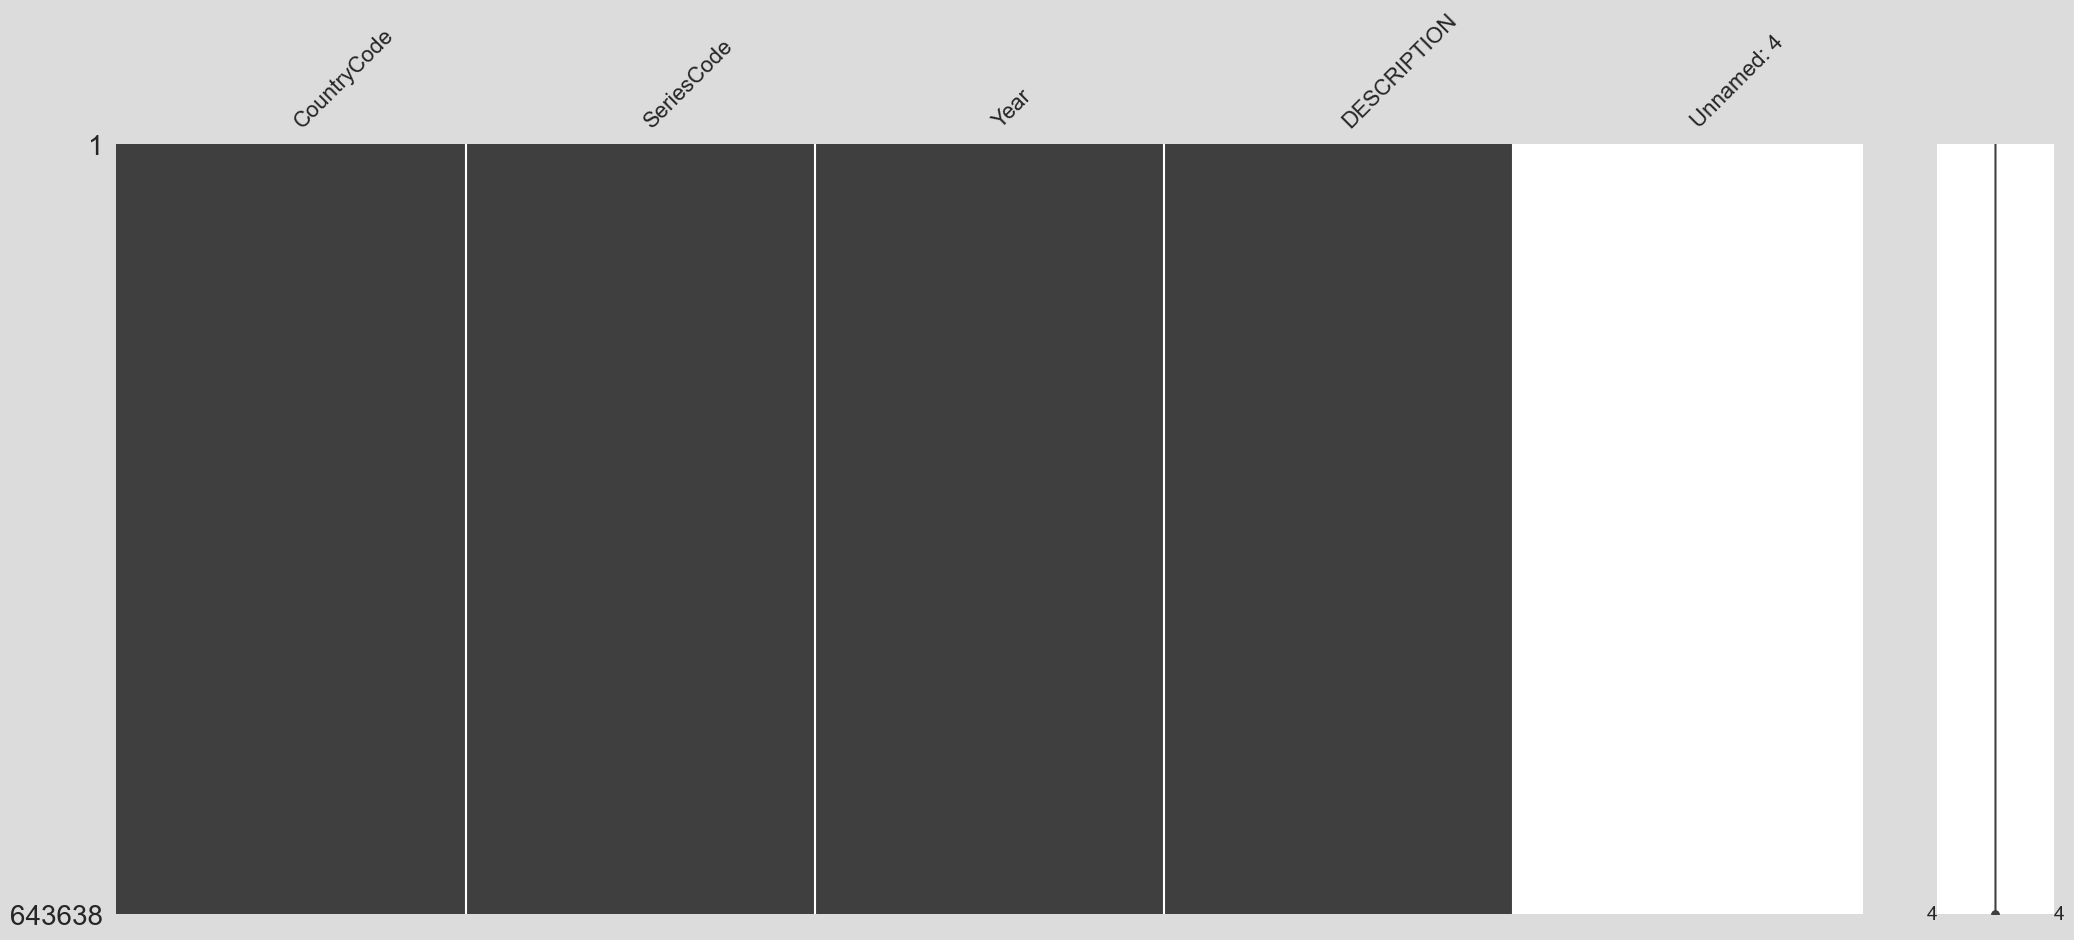

In [147]:
# map missing data
msno.matrix(footnote)

In [148]:
# calculate % of nulls in entire dataframe
footnote_nulls_pct = footnote.isna().sum().sum() / (footnote.shape[0]*footnote.shape[1]/100)
print(round(footnote_nulls_pct,2), '% de valeurs manquantes dans la table')

20.0 % de valeurs manquantes dans la table


### 1.5.2 Explore, clean & export

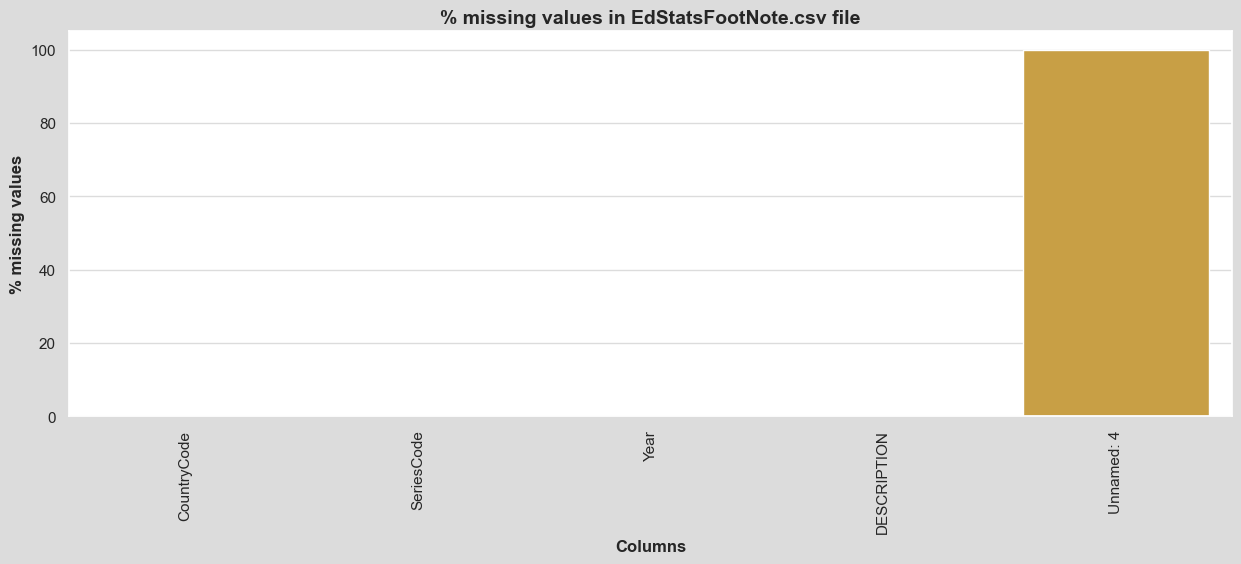

In [149]:
# plot % of missing values
footnote_nulls = pd.DataFrame(footnote.isnull().mean() * 100).reset_index()
footnote_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph16a = sns.barplot(data = footnote_nulls, x='Column', y='% missing values', color=tango)
plt.title('% missing values in EdStatsFootNote.csv file', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("16a.png", bbox_inches='tight')

- La colonne "Unnamed: 4" est entierement vide, il conviendra de la supprimer.

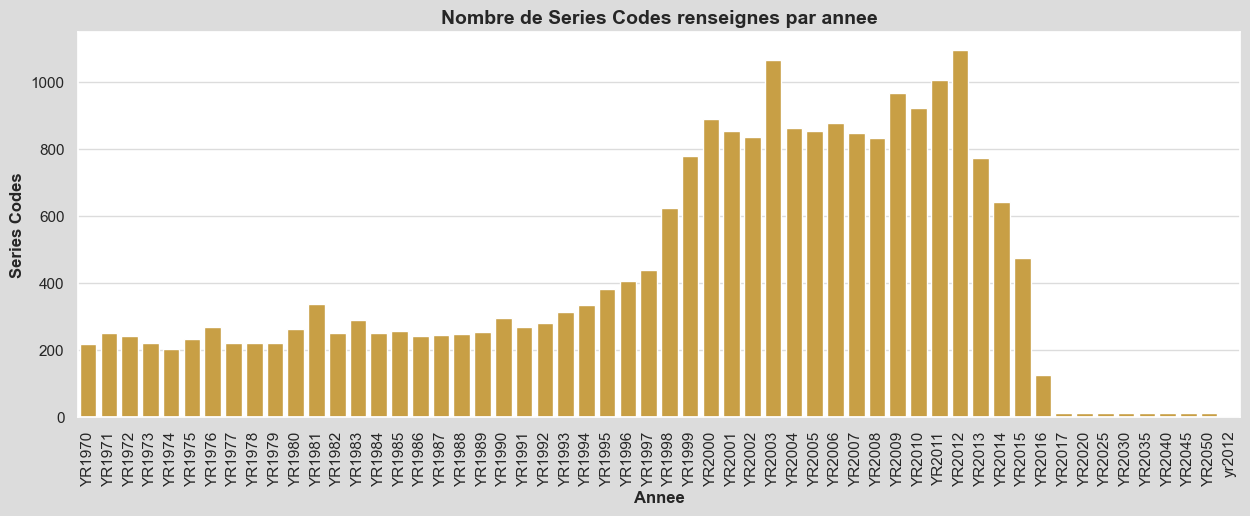

In [150]:
# plot series code by year
footnote_by_year = footnote.groupby('Year')['SeriesCode'].nunique().reset_index()
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph16b = sns.barplot(data = footnote_by_year, x='Year', y='SeriesCode', color=tango)
plt.title('Nombre de Series Codes renseignes par annee', fontweight='bold', fontsize='14')
plt.xlabel('Annee', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('Series Codes', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("16b.png", bbox_inches='tight')

- Le nombre de Series Codes renseignes chaque annee est relativement stable de 1970 a 1990 environ, puis augmente regulierement jusqu'en 1997, puis fortement de 1998 a 2012 avant de chuter a nouveau et d'etre minimal a partir de 2017.

In [151]:
footnote_by_code = footnote.groupby('SeriesCode')[['DESCRIPTION','Year']].count().sort_values(by='Year',ascending=False
                                                                                             ).reset_index()
print('- La table footnote comporte', footnote_by_code.shape[0], 'SeriesCodes distincts.')

- La table footnote comporte 1558 SeriesCodes distincts.


In [152]:
footnote_by_desc = footnote.groupby('DESCRIPTION')[['SeriesCode','Year']].count().sort_values(by='Year',ascending=False
                                                                                             ).reset_index()
print('Dimensions de la table footnote:', footnote.shape[0], 'lignes par', footnote.shape[1], 'colonnes.')
print('Dimensions de la table footnote_by_desc:', footnote_by_desc.shape[0], 'lignes par', footnote_by_desc.shape[1],
      'colonnes.')
footnote_by_desc.sample(5)

Dimensions de la table footnote: 643638 lignes par 5 colonnes.
Dimensions de la table footnote_by_desc: 9102 lignes par 3 colonnes.


DESCRIPTION  SeriesCode  Year
1273    Uncertainty bound is 41.6 - 71.6           1     1
7945  Uncertainty bound is 218.1 - 266.8           1     1
3766     Uncertainty bound is 87 - 104.9           1     1
3459     Uncertainty bound is 77 - 102.9           1     1
6894          Plausible bound is 6.3-8.2           1     1

- Un echantillonage successif de lignes prises aleatoirement dans la table footnote montre que les descriptions sont nombreuses et specifiques (9102 descriptions differentes au total), un meme Series Code (1558 uniques) pouvant donc avoir des DESCRIPTIONs differentes selon les annees.

In [153]:
in_countries_not_footnote = isInList(countries_trim['c_country_code'].unique(), footnote['CountryCode'].unique())
in_countries_not_footnote

[]

- Aucun pays present dans la table countries_trim n'est absent de la table footnote.

In [154]:
in_footnote_not_countries = isInList(footnote['CountryCode'].unique(), countries_trim['c_country_code'].unique())
len(in_footnote_not_countries)

72

- 72 CountryCodes presents dans la table footnote sont absents de la table countries_trim.

In [155]:
ifnc = country.loc[country['Country Code'].isin(in_footnote_not_countries)][['Country Code', 'Short Name', 'Region',
                                                                         'Income Group']]
ifnc.head(60)

Country Code                                      Short Name  \
0            ABW                                           Aruba   
1            AFG                                     Afghanistan   
5            ARB                                      Arab World   
9            ASM                                  American Samoa   
35           CHI                                 Channel Islands   
47           CUW                                         Curaçao   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
64           ERI                                         Eritrea   
68           EUU                                  European Union   
72           FRO                                  Faeroe Islands   
73           FSM                                      Micronesia   
78           GIB                                       Gibraltar   
87           GUM                                            Guam   
89           HIC                                     High income   
90           HKG                            Hong Kong SAR, China   
92           HPC          Heavily indebted poor countries (HIPC)   
94           HTI                                           Haiti   
97           IMN                                     Isle of Man   
100          IRN                                            Iran   
103          ISR                                          Israel   
112          KIR                                        Kiribati   
113          KNA                             St. Kitts and Nevis   
116          LAC     Latin America & Caribbean (developing only)   
121          LCA                                       St. Lucia   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
133          MAC                                Macao SAR, China   
139          MDV                                        Maldives   
140          MEA  Middle East & North Africa (all income levels)   
142          MHL                                Marshall Islands   
143          MIC                                   Middle income   
147          MMR                                         Myanmar   
148          MNA    Middle East & North Africa (developing only)   
151          MNP                        Northern Mariana Islands   
157          NAC                                   North America   
159          NCL                                   New Caledonia   
166          NRU                                           Nauru   
168          OED                                    OECD members   
174          PLW                                           Palau   
175          PNG                                Papua New Guinea   
177          PRI                                     Puerto Rico   
178          PRK                        Dem. People's Rep. Korea   
181          PSE                              West Bank and Gaza   
182          PYF                                French Polynesia   
185          RUS                                          Russia   
187          SAS                                      South Asia   
192          SLB                                 Solomon Islands   
198          SSA            Sub-Saharan Africa (developing only)   
199          SSD                                     South Sudan   
200          SSF          Sub-Saharan Africa (all income levels)   
201          STP                           São Tomé and Prin

In [156]:
ifnc.tail(12)

Country Code                      Short Name                      Region  \
209          SYR            Syrian Arab Republic  Middle East & North Africa   
210          TCA        Turks and Caicos Islands   Latin America & Caribbean   
216          TLS                     Timor-Leste         East Asia & Pacific   
218          TTO             Trinidad and Tobago   Latin America & Caribbean   
224          UKR                         Ukraine       Europe & Central Asia   
225          UMC             Upper middle income                         NaN   
229          VCT  St. Vincent and the Grenadines   Latin America & Caribbean   
231          VIR                  Virgin Islands   Latin America & Caribbean   
233          VUT                         Vanuatu         East Asia & Pacific   
234          WLD                           World                         NaN   
235          WSM                           Samoa         East Asia & Pacific   
237          YEM                           Yemen  Middle East & North Africa   

             Income Group  
209   Lower middle income  
210  High income: nonOECD  
216   Lower middle income  
218  High income: nonOECD  
224   Lower middle income  
225                   NaN  
229   Upper middle income  
231  High income: nonOECD  
233   Lower middle income  
234                   NaN  
235   Lower middle income  
237   Lower middle income

- Les 72 CountryCodes presents dans la table footnote mais absents de la table countries_trim correspondent a des pays que nous avons exclus de l'analyse pour des raisons geopolitiques, ou a des groupements de pays que nous avons egalement retires de la table countries_trim.

In [157]:
# remove alpha characters from Year column
footnote['Year'] =  footnote['Year'].astype('string')
footnote['year'] = footnote['Year'].str.strip('YR')
footnote['year'] = footnote['year'].str.strip('yr')

# remove country codes not in countries_trim table
footnote_trim = footnote.loc[~footnote['CountryCode'].isin(in_footnote_not_countries)][['CountryCode', 'SeriesCode',
                                                                                        'year', 'DESCRIPTION']].copy()

# rename columns
footnote_trim.rename(columns={'CountryCode': 'f_country_code', 'SeriesCode': 'f_series_code',
                          'year':'f_year', 'DESCRIPTION':'f_description'}, inplace=True)

# typecasting
footnote_trim['f_country_code'] = footnote_trim['f_country_code'].astype('string')
footnote_trim['f_series_code'] = footnote_trim['f_series_code'].astype('string')
footnote_trim['f_year'] = footnote_trim['f_year'].astype('int')
footnote_trim['f_description'] = footnote_trim['f_description'].astype('string')

# check typecasting & absence of nulls
footnote_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445607 entries, 3288 to 643637
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_country_code  445607 non-null  string
 1   f_series_code   445607 non-null  string
 2   f_year          445607 non-null  int32 
 3   f_description   445607 non-null  string
dtypes: int32(1), string(3)
memory usage: 15.3 MB


In [158]:
footnote_trim.head()

f_country_code   f_series_code  f_year  \
3288            AGO     SH.DYN.MORT    2005   
3289            AGO  SH.DYN.AIDS.ZS    2004   
3290            AGO     SH.DYN.MORT    1997   
3291            AGO     SH.DYN.MORT    2014   
3292            AGO     SH.DYN.MORT    2013   

                           f_description  
3288  Uncertainty bound is 140.7 - 198.5  
3289          Plausible bound is 1.1-1.6  
3290  Uncertainty bound is 195.9 - 247.1  
3291     Uncertainty bound is 50 - 151.5  
3292   Uncertainty bound is 56.1 - 155.1

In [159]:
footnote_trim_p = footnote_trim.pivot(columns='f_series_code', values=['f_description'],
                                                  index=['f_country_code','f_year']).droplevel(0, axis=1).reset_index()

In [160]:
footnote_trim_p.shape

(8075, 1499)

In [161]:
footnote_trim_p.head()

f_series_code f_country_code               f_year                       \
0                                     AGO                         1970   
1                                     AGO                         1971   
2                                     AGO                         1972   
3                                     AGO                         1973   
4                                     AGO                         1974   

f_series_code IT.NET.USER.P2              LO.LLECE.MAT3                \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code LO.LLECE.MAT3.P10           LO.LLECE.MAT3.P25            \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code LO.LLECE.MAT3.P50           LO.LLECE.MAT3.P75            \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code LO.LLECE.MAT3.P90           LO.LLECE.MAT6.0.FE           ...  \
0                                     NaN                         NaN  ...   
1                                     NaN                         NaN  ...   
2                                     NaN                         NaN  ...   
3                                     NaN                         NaN  ...   
4                                     NaN                         NaN  ...   

f_series_code UIS.XUNIT.US.4.FSGOV        UIS.XUNIT.US.56.FSGOV        \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code UIS.XUNIT.USCONST.1.FSGOV   UIS.XUNIT.USCONST.2.FSGOV    \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code UIS.XUNIT.USCONST.23.FSGOV  UIS.XUNIT.USCONST.3.FSGOV    \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code UIS.XUNIT.USCONST.4.FSGOV   UIS.XUNIT.USCONST.56.FSGOV   \
0                                     NaN                         NaN   
1                                     NaN                         NaN   
2                                     NaN                         NaN   
3                                     NaN                         NaN   
4                                     NaN                         NaN   

f_series_code

In [162]:
# export clean df for further analyses
footnote_trim.to_csv('footnote_trim.csv', index=False, encoding='utf8')